# Only Look Over This If you havent uncommented The Web scraping code.

In [61]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import re
import pingouin as pg

#### So after now we have cleaned the dataset,lets Start our EDA

In [2]:
flipkart=pd.read_csv("flipkart_6896.csv")

In [96]:
flipkart

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Ratings,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
0,Lenovo,Lenovo IdeaPad Gaming Ryzen 5 Hexa Core 4600H ...,AMD,Ryzen 5Core 4600H,Ryzen 5,Windows 10,8,1 TB,256 GB,1 TB HDD 256 GB SSD,NVIDIA,4.0,0.0,63990,26.0,47352.60,256.0,1024.0
1,Lenovo,Lenovo Core i5 9th Gen - (8 GB/1 TB HDD/Window...,Intel,Core i5,9th Gen,Windows 10,8,1 TB,0,1 TB HDD,NVIDIA,3.0,4.1,49990,28.0,35992.80,0.0,1024.0
2,HP,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel,Pentium,10th Gen,Windows 10,8,0,256 GB,256 GB SSD,not mentioned,0.0,4.4,31490,8.0,28970.80,256.0,0.0
3,ASUS,ASUS VivoBook 15 Core i3 10th Gen - (8 GB/1 TB...,Intel,Core i3,10th Gen,Windows 10,8,1 TB,0,1 TB HDD,not mentioned,0.0,4.1,34910,0.0,34910.00,0.0,1024.0
4,HP,HP 14s Ryzen 3 Quad Core 4300U - (8 GB/512 GB ...,AMD,Ryzen 3Core 4300U,Ryzen 3,Windows 10,8,0,512 GB,512 GB SSD,not mentioned,0.0,4.4,39490,11.0,35146.10,512.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,ASUS,ASUS ZenBook 14 Core i7 8th Gen - (8 GB/512 GB...,Intel,Core i7,8th Gen,Windows 10,8,0,512 GB,512 GB SSD,not mentioned,0.0,4.5,85990,14.0,73951.40,512.0,0.0
330,ASUS,ASUS ExpertBook B9 Core i7 10th Gen - (16 GB/1...,Intel,Core i7,10th Gen,Windows 10,16,0,1 TB,1 TB SSD,not mentioned,0.0,0.0,167990,17.0,139431.70,1024.0,0.0
332,Avita,Avita Pura Ryzen 5 Quad Core 3500U - (8 GB/512...,AMD,Ryzen 5Core 3500U,Ryzen 5,Windows 10,8,0,512 GB,512 GB SSD,not mentioned,0.0,4.2,30792,41.0,18167.28,512.0,0.0
333,HP,HP 15 Core i7 8th Gen - (8 GB/1 TB HDD/128 GB ...,Intel,Core i7,8th Gen,Windows 10,8,1 TB,128 GB,1 TB HDD 128 GB SSD,not mentioned,4.0,0.0,116941,0.0,116941.00,128.0,1024.0


In [3]:
flipkart[(flipkart["ModelName"].duplicated()) & (flipkart["Brand"]=="Lenovo")]

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Ratings,Price,Discount(%)
38,Lenovo,Lenovo IdeaPad Gaming Ryzen 5 Hexa Core 4600H ...,AMD,Ryzen 5Core 4600H,Ryzen 5,Windows 10,8,1 TB,256 GB,1 TB HDD 256 GB SSD,NVIDIA,4.0,0.0,63990,26.0
51,Lenovo,Lenovo IdeaPad Gaming Ryzen 5 Hexa Core 4600H ...,AMD,Ryzen 5Core 4600H,Ryzen 5,Windows 10,8,1 TB,256 GB,1 TB HDD 256 GB SSD,NVIDIA,4.0,0.0,63990,26.0
55,Lenovo,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel,Core i5,10th Gen,Windows 10,8,1 TB,0,1 TB HDD,not mentioned,0.0,3.9,42990,35.0
59,Lenovo,Lenovo Core i5 9th Gen - (8 GB/1 TB HDD/Window...,Intel,Core i5,9th Gen,Windows 10,8,1 TB,0,1 TB HDD,NVIDIA,3.0,4.1,49990,28.0
63,Lenovo,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core 4800...,AMD,Ryzen 7Core 4800H,Ryzen 7,Windows 10,8,0,512 GB,512 GB SSD,NVIDIA,4.0,4.0,67990,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Lenovo,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel,Core i5,10th Gen,Windows 10,8,1 TB,0,1 TB HDD,not mentioned,0.0,3.9,42990,35.0
323,Lenovo,Lenovo Core i5 9th Gen - (8 GB/1 TB HDD/Window...,Intel,Core i5,9th Gen,Windows 10,8,1 TB,0,1 TB HDD,NVIDIA,3.0,4.1,49990,28.0
327,Lenovo,Lenovo Ideapad 5 Ryzen 7 Octa Core 4700U - (8 ...,AMD,Ryzen 7Core 4700U,Ryzen 7,Windows 10,8,0,512 GB,512 GB SSD,not mentioned,0.0,4.4,57990,4.0
331,Lenovo,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core 4800...,AMD,Ryzen 7Core 4800H,Ryzen 7,Windows 10,8,0,512 GB,512 GB SSD,NVIDIA,4.0,4.0,67990,24.0


In [4]:
sbn.set_style("whitegrid")
plt.rcParams["xtick.labelsize"]=15
plt.rcParams["ytick.labelsize"]=15
plt.rcParams["axes.titlesize"]=15
plt.rcParams["axes.labelsize"]=15
plt.rcParams['font.size'] = 15
#flipkart.assign(Product=lambda x: (x["HDD_GB"]+" "+x["SSD_GB"]))

#### Lets Add Discounted Price Column for analysis

In [5]:
flipkart["DiscountedPrice"]=flipkart["Price"]*((100-flipkart["Discount(%)"])/100)

#### Just Making Sure We Dont have Duplicate Values In Dataset,So That if doesnt affect our Anlayis.

In [6]:
flipkart.drop_duplicates(subset="ModelName",inplace=True)

#### Info helps us to understand the Which columns may be null and whats the datatype of each Column.

#### So Looking Below we see that there are no null values in Data Frame

In [7]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 334
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                245 non-null    object 
 1   ModelName            245 non-null    object 
 2   ProcessorBrand       245 non-null    object 
 3   ProcessorName        245 non-null    object 
 4   ProcessorGeneration  245 non-null    object 
 5   OS                   245 non-null    object 
 6   RAM                  245 non-null    int64  
 7   HDD                  245 non-null    object 
 8   SSD                  245 non-null    object 
 9   StorageDrive         245 non-null    object 
 10  GraphicCardBrand     245 non-null    object 
 11  GraphicCardSize      245 non-null    float64
 12  Ratings              245 non-null    float64
 13  Price                245 non-null    int64  
 14  Discount(%)          245 non-null    float64
 15  DiscountedPrice      245 non-null    flo

#### Describe function tells us about the more details Like mean,median,mode and count.
#### For ram: The 75% of values are 8 GB
#### For ratings Most of are around 4
#### For Price most of the values are in range 60-77 K
#### For Discount We can say that max to max around 25% discount is Given

In [8]:
flipkart.describe()

,RAM,GraphicCardSize,Ratings,Price,Discount(%),DiscountedPrice
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,9.502041,1.465306,3.536327,78027.355102,14.726531,66999.866408
std,5.440908,2.328507,1.754183,47526.434817,10.844028,43119.639904
min,4.000000,0.000000,0.000000,17990.000000,0.000000,13852.300000
25%,8.000000,0.000000,3.800000,46999.000000,6.000000,39830.400000
50%,8.000000,0.000000,4.300000,62990.000000,13.000000,51672.400000
75%,8.000000,4.000000,4.500000,95825.000000,22.000000,81991.800000
max,32.000000,8.000000,5.000000,269990.000000,47.000000,245690.900000


# Univariate Plot

#### Lets Plot The Heatmap, Which Will give us Idea About Relationships Between laptop Configurations

Text(0.5, 1.0, 'HeatMap Comparison')

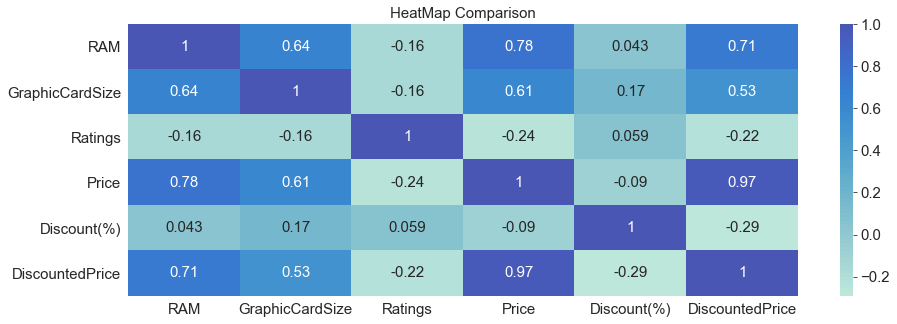

In [9]:
sbn.set_style("whitegrid")
plt.rcParams["xtick.labelsize"]=15
plt.rcParams["axes.titlesize"]=15
plt.rcParams["axes.labelsize"]=15
plt.figure(figsize=(15,5))
sbn.heatmap(flipkart.corr(),annot=True,center=2)
plt.title("HeatMap Comparison")

#### Aboove Heatmaps tell us that Price Is Highly Dependent on RAM and Yes Discount Price is dependednt on Original Price.It May be that More the Ram,The More is The Price and Discount Price is calculated from Original Price itself So Definately Its releted and Obvious.

#### But If RAM affects Price then So Does, Storage Space Too. Just To relate Lets Convert The Storage Of SSD/HDD into GB.

In [10]:
flipkart["SSD_GB"]=flipkart["SSD"].apply(lambda x:" ".join(re.split("\s(?:TB|GB)",x)))
flipkart["HDD_GB"]=flipkart["HDD"].apply(lambda x:" ".join(re.split("\s(?:TB|GB)",x)))
flipkart["SSD_GB"]=flipkart["SSD_GB"].astype("float")
flipkart["HDD_GB"]=flipkart["HDD_GB"].astype("float")

In [11]:
flipkart["SSD_GB"]=flipkart["SSD_GB"].apply(lambda x:x*1024 if x<128 else x)
flipkart["HDD_GB"]=flipkart["HDD_GB"].apply(lambda x:x*1024 if x<128 else x)

# multiivariate Plot

Text(0.5, 1.0, 'HeatMap Comparison')

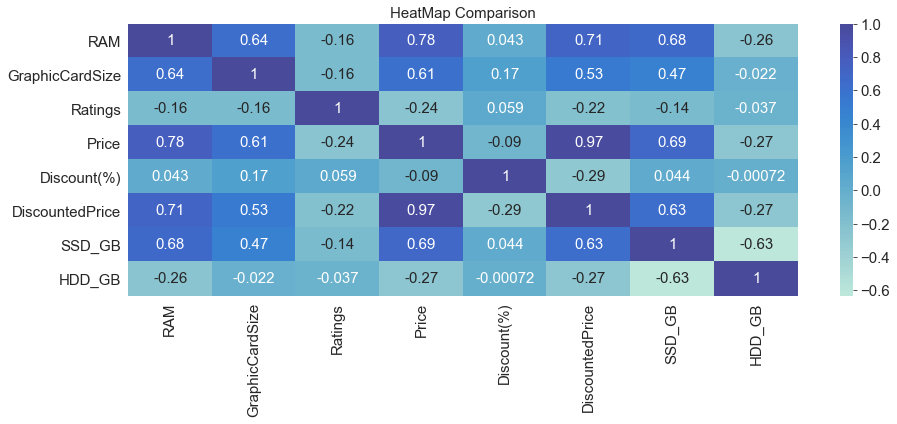

In [12]:
plt.figure(figsize=(15,5))
sbn.heatmap(flipkart.corr(),annot=True,center=2)
plt.title("HeatMap Comparison")

#### As We See, After Converting The HDD and SDD to GB,We Infer That Storage Too Does Impact On Price,But Here SSD Plays Role Rather Than HDD. So it May be That SSD weigs more than HDD as SSD implemention is Not easy and Takes Efforts. So It Definately Needs To Be Paid OFF and that Why Price is Imapcted

#### Now We Understand That RAM,SSD_GB impact Price,So lets See the realtion Via Scatter Plot and See what does it Say

# Univariate Plot

Text(0.5, 1.0, 'SSD vs Price Comaparison')

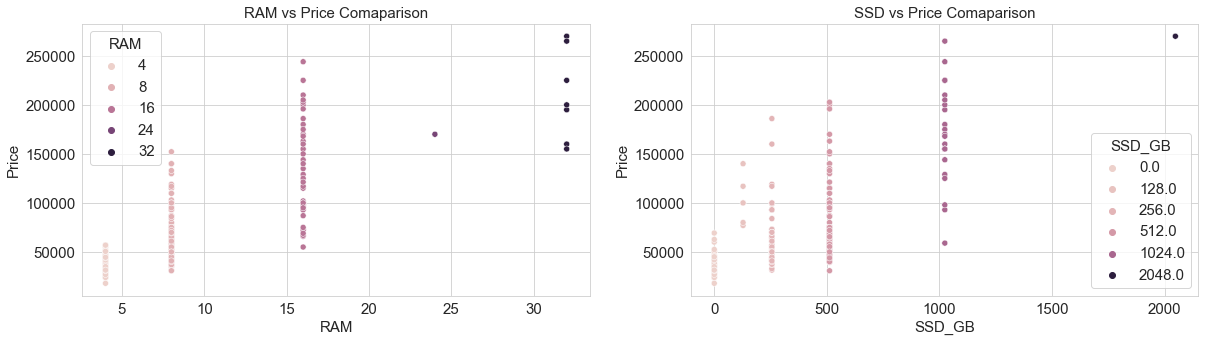

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sbn.scatterplot(x="RAM",y="Price",hue="RAM",data=flipkart)
plt.title("RAM vs Price Comaparison")
plt.subplot(122)
sbn.scatterplot(x="SSD_GB",y="Price",hue="SSD_GB",data=flipkart)
plt.title("SSD vs Price Comaparison")

#### Now As Per ABoove Scatter Plot, We Can Say That More the RAM,More The Price May Increase and For SSD if it Goes Beyond 512 GB, The Price Will Increase

#### Lets Check whats the Max Discount percentage Given Via Box plot

# Univariate Plot

Text(0.5, 1.0, 'Discount Distribution')

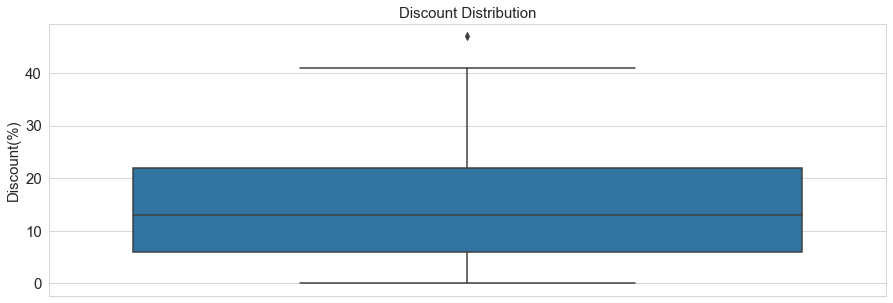

In [14]:
plt.figure(figsize=(15,5))
sbn.boxplot(y="Discount(%)",data=flipkart)
plt.title("Discount Distribution")

##### From Aboove Graph We Can Say That Mosst of the Products Displayed the avergae discount is below 15 % and most of the products have max discount around 23 %. There are not much product Which exceed 22 % discount

#### Lets Check The Original Price and discount Price Distribution of displayed Laptops

#### Lets See what can we infer from box plot About Original and Discount Price 

# Bivariate Plot

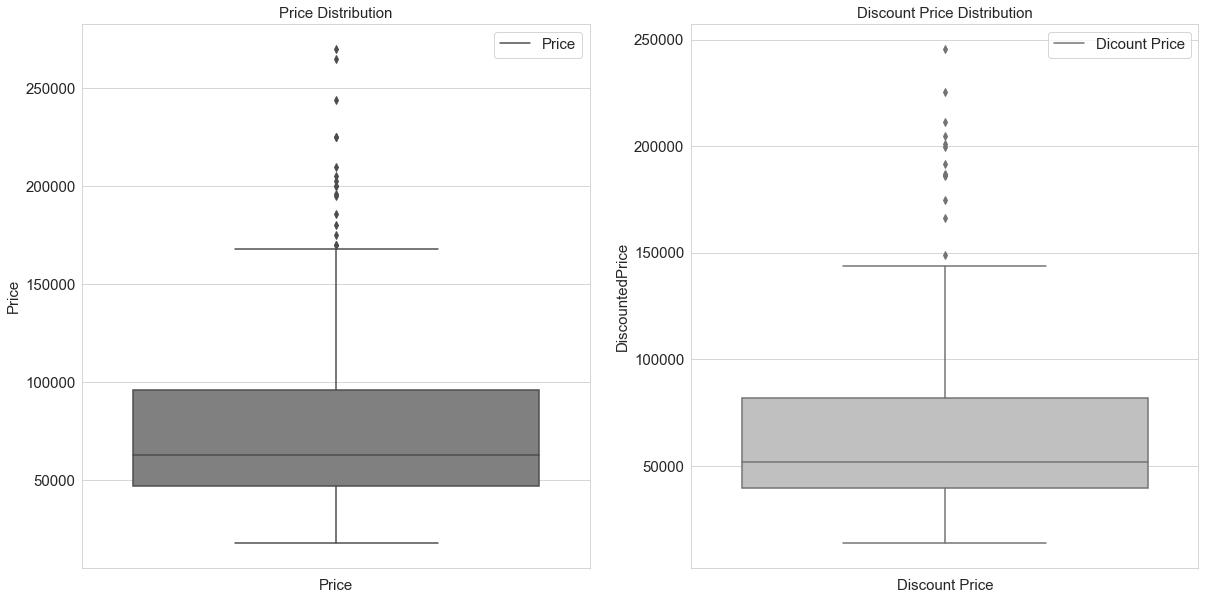

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sbn.boxplot(y="Price",data=flipkart,color="grey")
plt.xlabel("Price")
plt.title("Price Distribution")
plt.legend(["Price"])
plt.subplot(122)
sbn.boxplot(y="DiscountedPrice",data=flipkart,color="silver")
plt.xlabel("Discount Price")
plt.title("Discount Price Distribution")
plt.legend(["Dicount Price"])

#### With Box plot We Can See The Average Price Shift is 12.5

#### This Can Be Also Done Via Histogram or Distplot,As they explian the frequency distribution of values But Box plot give Precise distribution info and thus via box we can Infer How Many values Lie in which Range

#### For a Add On Lets Check With Histogram

# Bivariate Plot

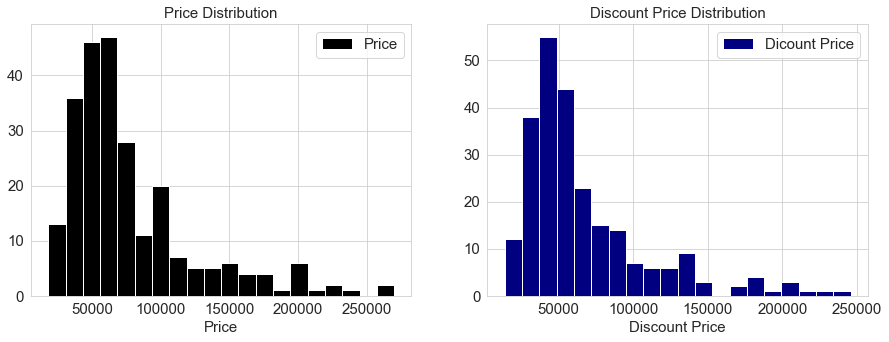

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(121)
flipkart["Price"].hist(bins=20,color="black")
plt.xlabel("Price")
plt.title("Price Distribution")
plt.legend(["Price"])
plt.subplot(122)
flipkart["DiscountedPrice"].hist(bins=20,color="navy")
plt.xlabel("Discount Price")
plt.title("Discount Price Distribution")
plt.legend(["Dicount Price"])

#### Lets Check Which Brand is Displayed On Screen

# Univariate Plot

Text(0.5, 1.0, 'Brands Displayed On Screen')

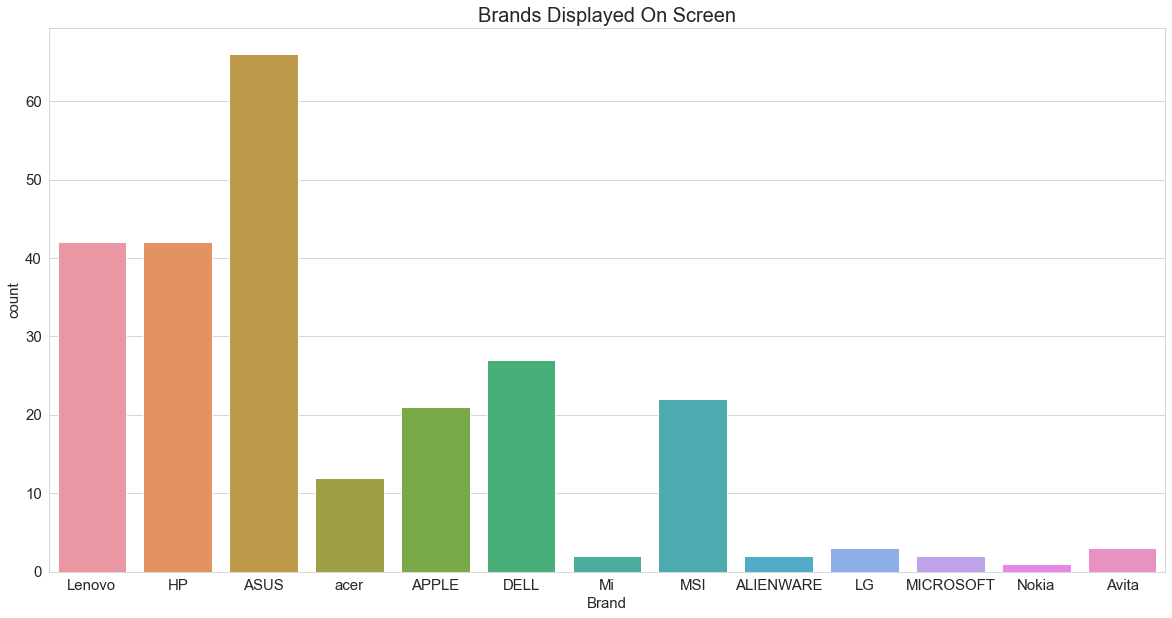

In [17]:
plt.figure(figsize=(20,10))
sbn.countplot(x="Brand",data=flipkart)
plt.title("Brands Displayed On Screen",fontsize=20)

#### Looking Aboove, It Looks Like Lenevo,HP and Asus are Top 3 Models Displayed.In Which ASUS Ranks First and is Highly Sold.

#### Lets Check Which Processor Is widely Displayed

# Univariate Plot

Text(0.5, 1.0, 'Processor Brand Count')

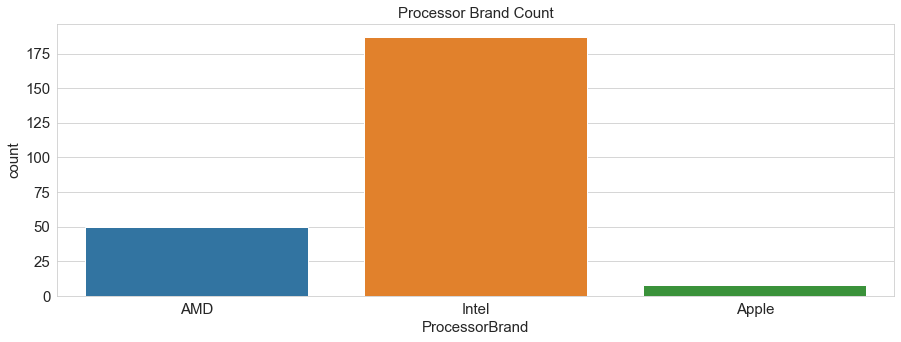

In [18]:
plt.figure(figsize=(15,5))
sbn.countplot(x="ProcessorBrand",data=flipkart)
plt.title("Processor Brand Count")

#### 1.Looking Aboove It Seems That Intel Processors Are displayed mostly with Top Selling Brands i.e Lenevo,Hp and Asus. Its Quite Obvious that Intel is Oldest and yet Better Processor Which Offers Better Performance with its Multi_Process Scaling so thats why it has max displays


#### 2.Apple Seems to be Least Sold and Can be said that since Apple Laptops are Not Pocket Friendly,They Seems to be used by wealthy people. So they low in displays

#### Lets See Which Intel Processor Model is Mostly Sold

# Univariate Plot

Text(0.5, 1.0, 'Processor Model Count')

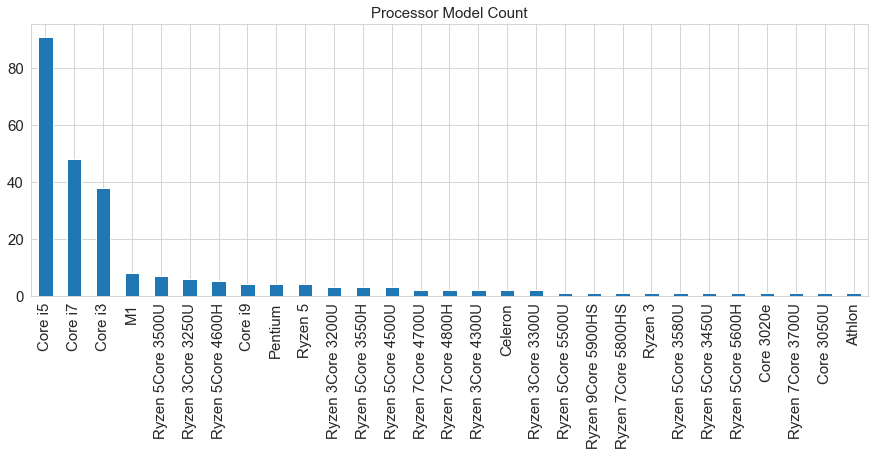

In [19]:
plt.figure(figsize=(15,5))
flipkart["ProcessorName"].value_counts().plot(kind="bar")
plt.title("Processor Model Count")

#### As we Saw aboove,Intel Processors are Displayed more,Therfore Models By Intel top the scale and in that model also, i5 processors are lot in display

#### Lets See Whats the Generation has highest display

# Univariate Plot

Text(0.5, 1.0, 'Processor Generation Count')

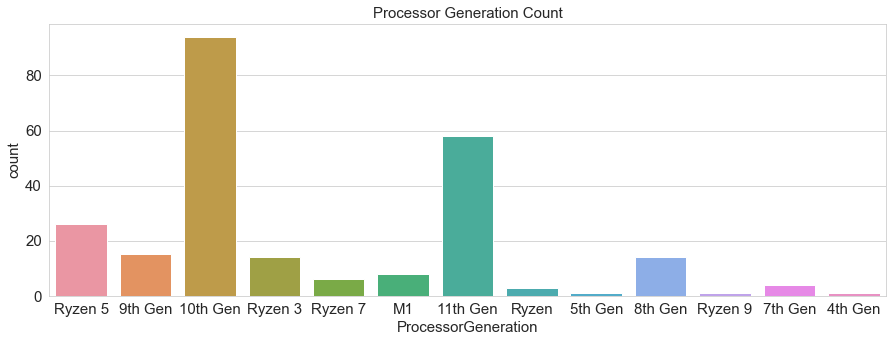

In [20]:
plt.figure(figsize=(15,5))
sbn.countplot(x="ProcessorGeneration",data=flipkart)
plt.title("Processor Generation Count")

#### Lets Check The Max Count Ram Size displayed

# Univariate Plot

Text(0.5, 1.0, 'RAM Count')

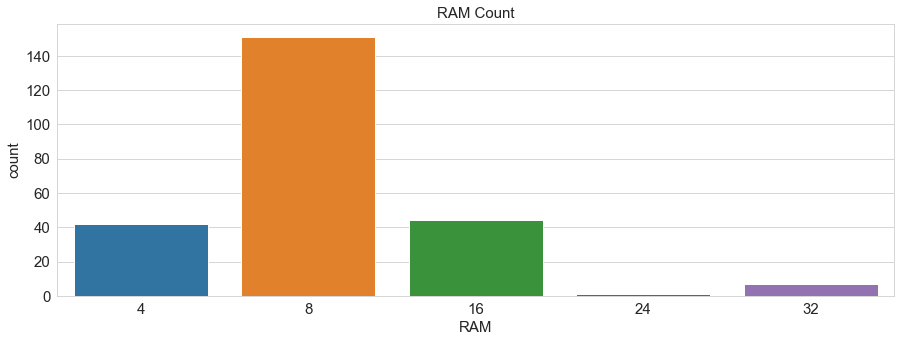

In [21]:
plt.figure(figsize=(15,5))
sbn.countplot(x="RAM",data=flipkart)
plt.title("RAM Count")

#### As we Can See 8 gb Ram is Majorly Displayed On the Page. So it Can Be Like Average Buying Pattern of Any One Looking Laptop Use Prefers 8 Gb Ram

#### So We will Consider RAM that is equal to and greater than 8 GB. We cannot Take less than that. Remember whats highest,we take that and more than that as consideration for our filter.


#### If 16 GB had highest count then we would have taken RAM >=16 GB
#### If 4 GB had Highest count then we would have taken RAM>=4 GB
#### And So On

#### Lets See How Many Products Displayed Offer Grahic Card Description. This Is a Optional Part and Solely depends on Customer. This Doesnt Count any value for analysis

# Multivariate

Text(0.5, 1.0, 'Graphic Card Count')

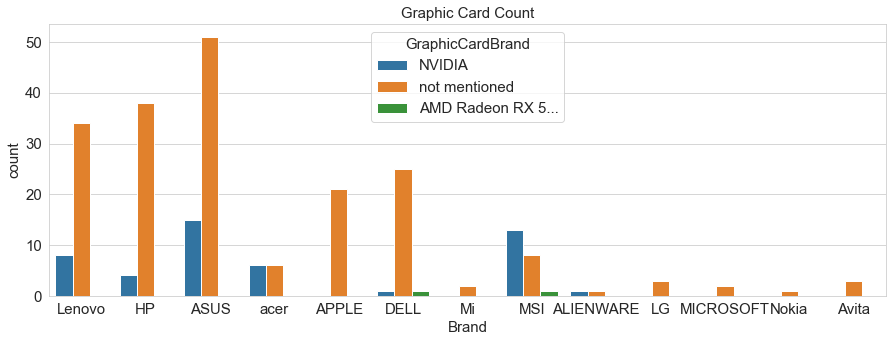

In [22]:
plt.figure(figsize=(15,5))
sbn.countplot(x="Brand",hue="GraphicCardBrand",data=flipkart)
plt.title("Graphic Card Count")

#### So As We see,Most of the Products havent displayed Graphic Card Brand,May be they come up with thier Own,while MSI Brand is Highest Count For NVIDIA and ASUS is also Nearly equal. So as i said its a independent factor and doesnt matter. So This Doesnt Matter anyways

#### Lets Check What the Storage Size Displayed

#### Lets Check For SSD Storage

# Univariate Plot

Text(0.5, 1.0, 'SDD Count')

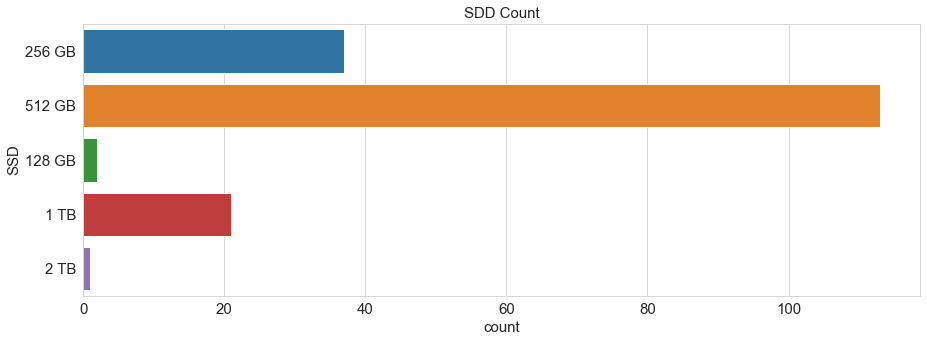

In [23]:
plt.figure(figsize=(15,5))
sbn.countplot(data=flipkart[(flipkart["HDD_GB"]==0) & (flipkart["SSD_GB"]!=0)],y="SSD")
plt.title("SDD Count")

#### Most Of the Laptops having only Having SSD only having Storage Size of 512 GB and the Second Most After that most of the laptops have storage size of 256 GB. And there are SSD's More than 512 also but low on count. we see a 2 TB SSD which may be rare and maybe uprising and in fututre we may see more counts of 1 TB and 2 TB as we see for SSD 512 GB.

#### But 256 GB is less than 512,so we wont consider that and min size to use for regular purpose is 512 GB. I mean if we have a high count of better option why to scale below ?. yeah But if was reverse like 256 GB SSD's were more in count than yes we would have considered SSD >=256 GB. Bcoz 256 is most displayed so ==256 just to see and analyse those counts and Anything more than 256 will always be good but not less and even if it was 256 GB still in the end we would have recommended >256 GB as 256 Gb space laptops wont be enough so Min space must be 512 which comes after 256 GB. so in the end our recommded list would have laptops with space >256 GB SSD or HDD or both. we take 256 also here in consideration bcoz 256 GB has more counts so just to see how many laptops have exactly 256 GB SSD or HDD we would taken it but in then edn after analysis we would have remooved data having ==256 GB Laptops.

#### So Similarly we will consider SSD size >=512 GB as 512 GB is most displayed so 512 and anything more than that will be good and its our luck that 512 GB SSD has highest count and is min space also for Laptops so we will take ==512 GB laptops also as its not less than min requirement.

# Note:
#### 512 GB is minimum space everone should prefer as <512 Gb wont be sufficient and wont last long unless used on very low count.

#### Similarly lets Plot the Same for HDD.

Text(0.5, 1.0, 'HDD Count')

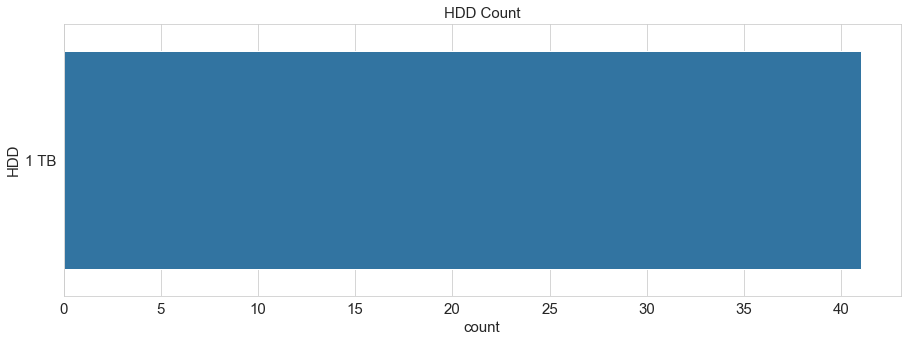

In [24]:
plt.figure(figsize=(15,5))
sbn.countplot(y="HDD",data=flipkart[(flipkart["SSD_GB"]==0) & (flipkart["HDD_GB"]!=0)])
plt.title("HDD Count")

#### So Most of The Laptops Having Only HDD,have a space Of 1 TB only. So for HDD we will consider only for 1 TB. 

#### So With This we get idea about what filters to apply also.

#### Lets See For Laptops having SSD and HDD both.

Text(0.5, 1.0, 'HDD/SDD Count')

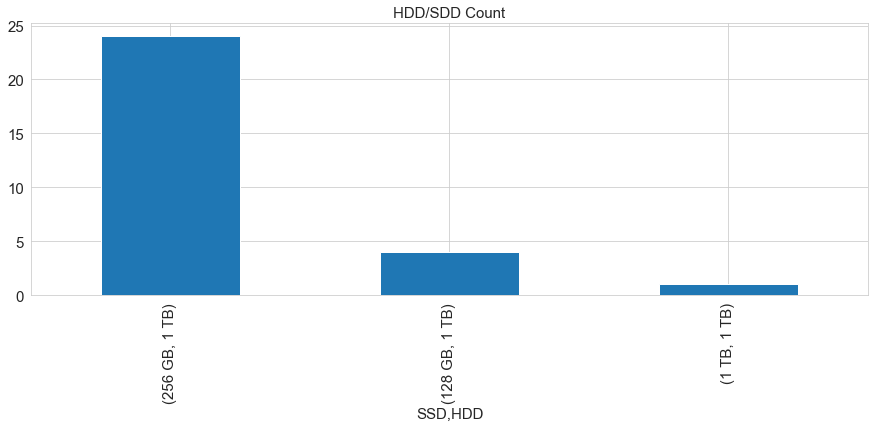

In [25]:
plt.figure(figsize=(15,5))
flipkart[(flipkart["SSD_GB"]!=0) & (flipkart["HDD_GB"]!=0)][["SSD","HDD"]].value_counts().plot(kind="bar")
plt.title("HDD/SDD Count")

#### So Laptops having Both SSD and HDD of 256 GB and 1 TB are More. We would need to take 256 GB SSD as Filter if we are Analysing For Laptops having SSD and HDD.

#### Fortunately that gets covered with 1 TB HDD and our SSD value min will be 512 and more. So we dont need to take 256 GB as value when we analyse. As discussed in SSD plot Cell. But Still Lets See How Many Brands Lie With Intel i5 10th gen 8 GB RAM 512 GB SSD only. Well This is Just To See and Analyse The Count Difference With Intel i5 10th gen >=512 GB SSD|HDD >=8GB RAM.

#### So Just Lets See

#### Based On The Graphs Plotted For Processor Brand,Processor Name and generation,RAM and Storage, We May or may not see that for all these properties and features, ASUS Brand must be fitting in it as its the most displayed brand on flipkart

<AxesSubplot:xlabel='count', ylabel='Brand'>

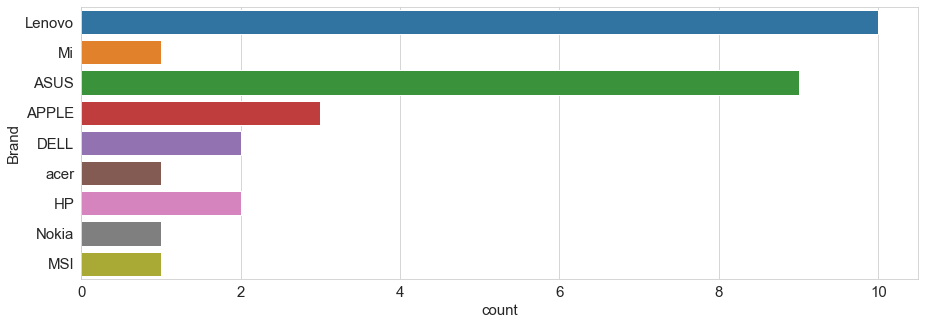

In [26]:
plt.figure(figsize=(15,5))
sbn.countplot(data=flipkart[(flipkart["ProcessorBrand"]=="Intel") & (flipkart["ProcessorName"]=="Core i5") & (flipkart["ProcessorGeneration"]=="10th Gen") & (flipkart["RAM"]==8) & ((flipkart["SSD_GB"]==512) | (flipkart["HDD_GB"]==1024))],y="Brand")

# Univariate Plot

<AxesSubplot:xlabel='count', ylabel='Brand'>

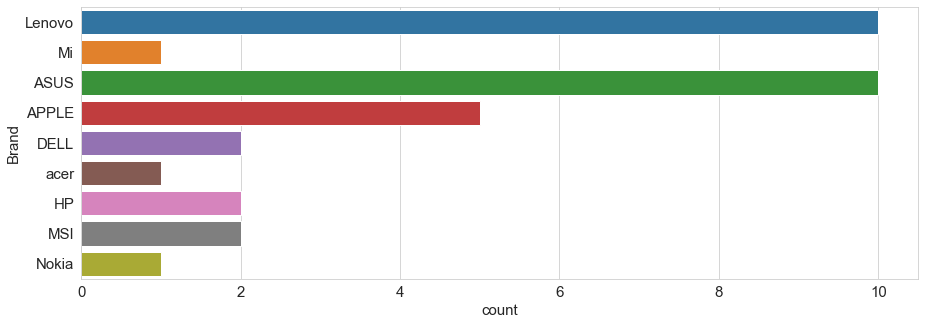

In [27]:
plt.figure(figsize=(15,5))
sbn.countplot(data=flipkart[(flipkart["ProcessorBrand"]=="Intel") & (flipkart["ProcessorName"]=="Core i5") & (flipkart["ProcessorGeneration"]=="10th Gen") & (flipkart["RAM"]>=8) & ((flipkart["SSD_GB"]>=512) | (flipkart["HDD_GB"]>=1024))],y="Brand")

#### Comparing The Plot aboove the aboove Graphs we see, 
#### ASUS and MSI has One Model Which May Have RAM>8 or SSD|HDD >512 GB
#### Apple Has Two Model Which May Have RAM>8 or SSD|HDD >512 GB

#### But This Comparison was just to get the General idea of which brand may have only 8GB RAM and >8GB RAM, Storage only 512 GB SSD and >512 GB SSD|HDD. 
#### But To Analyse The Products We Definately will be taking >=8GB RAM,>=512 GB SSD as well as HDD too as This filter will Cover Products Of Only 8GB RAM as well as >8 GB RAM,Storage Only of 512 GB SSD as well as >512 GB SSD as well as HDD. So we get all the info at once with (>=) sign

#### From Abbove(In Plot of >=8GB,>=512 GB SSD|HDD) We See that ASUS,Lenovo and Apple are  Brands Which have i5 10th Gen RAM of 8 GB or More,SSD 512 Gb or more and HDD of 1 TB as HDD size is 1 TB only for laptops displayed on flipkart. But >=512 GB HDD means 1 TB HDD only also and covers that too as no HDD <1 TB so >=512 GB HDD will give only 1 TB HDD results.

#### Dell,MSI and HP have 2 Laptops falling In This Configuration while others have one.

#### Lets Check Which Models for this top 3 Brands Are.

In [28]:
Top_3_i5_10th_Gen=flipkart[((flipkart["Brand"]=="ASUS")|(flipkart["Brand"]=="Lenovo")|(flipkart["Brand"]=="APPLE")) & (flipkart["ProcessorBrand"]=="Intel") & (flipkart["ProcessorName"]=="Core i5") & (flipkart["ProcessorGeneration"]=="10th Gen") & ((flipkart["SSD_GB"]>=512)|(flipkart["HDD_GB"]>=512))]
Top_3_i5_10th_Gen

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Ratings,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
16,Lenovo,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel,Core i5,10th Gen,Windows 10,8,1 TB,0,1 TB HDD,not mentioned,0.0,3.9,42990,35.0,27943.50,0.0,1024.0
27,ASUS,ASUS VivoBook 15 Core i5 10th Gen - (8 GB/1 TB...,Intel,Core i5,10th Gen,Windows 10,8,1 TB,256 GB,1 TB HDD 256 GB SSD,not mentioned,0.0,4.3,53990,0.0,53990.00,256.0,1024.0
39,Lenovo,Lenovo IdeaPad 3 Core i5 10th Gen - (8 GB/1 TB...,Intel,Core i5,10th Gen,Windows 10,8,1 TB,0,1 TB HDD,not mentioned,0.0,4.3,43990,31.0,30353.10,0.0,1024.0
72,ASUS,ASUS ROG Strix G15 Core i5 10th Gen - (8 GB/51...,Intel,Core i5,10th Gen,Windows 10,8,0,512 GB,512 GB SSD,NVIDIA,4.0,4.6,71990,29.0,51112.90,512.0,0.0
78,Lenovo,Lenovo Ideapad 3 Core i5 10th Gen - (8 GB/1 TB...,Intel,Core i5,10th Gen,Windows 10,8,1 TB,0,1 TB HDD,not mentioned,2.0,4.1,50456,26.0,37337.44,0.0,1024.0
82,ASUS,ASUS Core i5 10th Gen - (8 GB/512 GB SSD/Windo...,Intel,Core i5,10th Gen,Windows 10,8,0,512 GB,512 GB SSD,not mentioned,2.0,4.2,53990,2.0,52910.20,512.0,0.0
116,ASUS,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,Intel,Core i5,10th Gen,Windows 10,8,0,512 GB,512 GB SSD,NVIDIA,4.0,4.8,69576,22.0,54269.28,512.0,0.0
124,Lenovo,Lenovo Yoga C640 Core i5 10th Gen - (8 GB/512 ...,Intel,Core i5,10th Gen,Windows 10,8,0,512 GB,512 GB SSD,not mentioned,0.0,4.8,75990,34.0,50153.40,512.0,0.0
128,APPLE,APPLE MacBook Air Core i5 10th Gen - (8 GB/512...,Intel,Core i5,10th Gen,Mac OS,8,0,512 GB,512 GB SSD,not mentioned,0.0,4.5,99990,18.0,81991.80,512.0,0.0
132,APPLE,APPLE MacBook Air Core i5 10th Gen - (8 GB/512...,Intel,Core i5,10th Gen,Mac OS,8,0,512 GB,512 GB SSD,not mentioned,0.0,4.5,99990,18.0,81991.80,512.0,0.0


#### As per Aboove Table,For 3 Brands there are Total 27 Models But Lets See How Many Model Each  Brands Has which falls Under This Configuration

<AxesSubplot:xlabel='Brand', ylabel='count'>

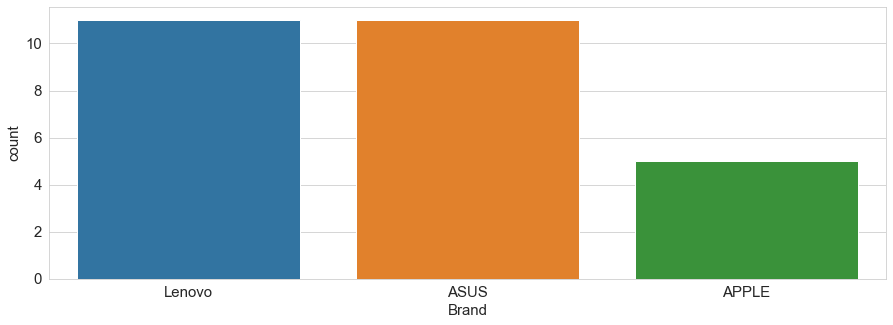

In [29]:
plt.figure(figsize=(15,5))
sbn.countplot(x="Brand",data=Top_3_i5_10th_Gen)

#### So ASUS and Lenovo Have Equal No of Their Models in display which fall under this Configuration. We Know that these Brands and thier models have RAM of 8 GB 512 GB+ SSD or HDD

#### So lets See which Brand has What Ram,Storage size,Is is SSD or HDD.

<AxesSubplot:xlabel='Brand', ylabel='count'>

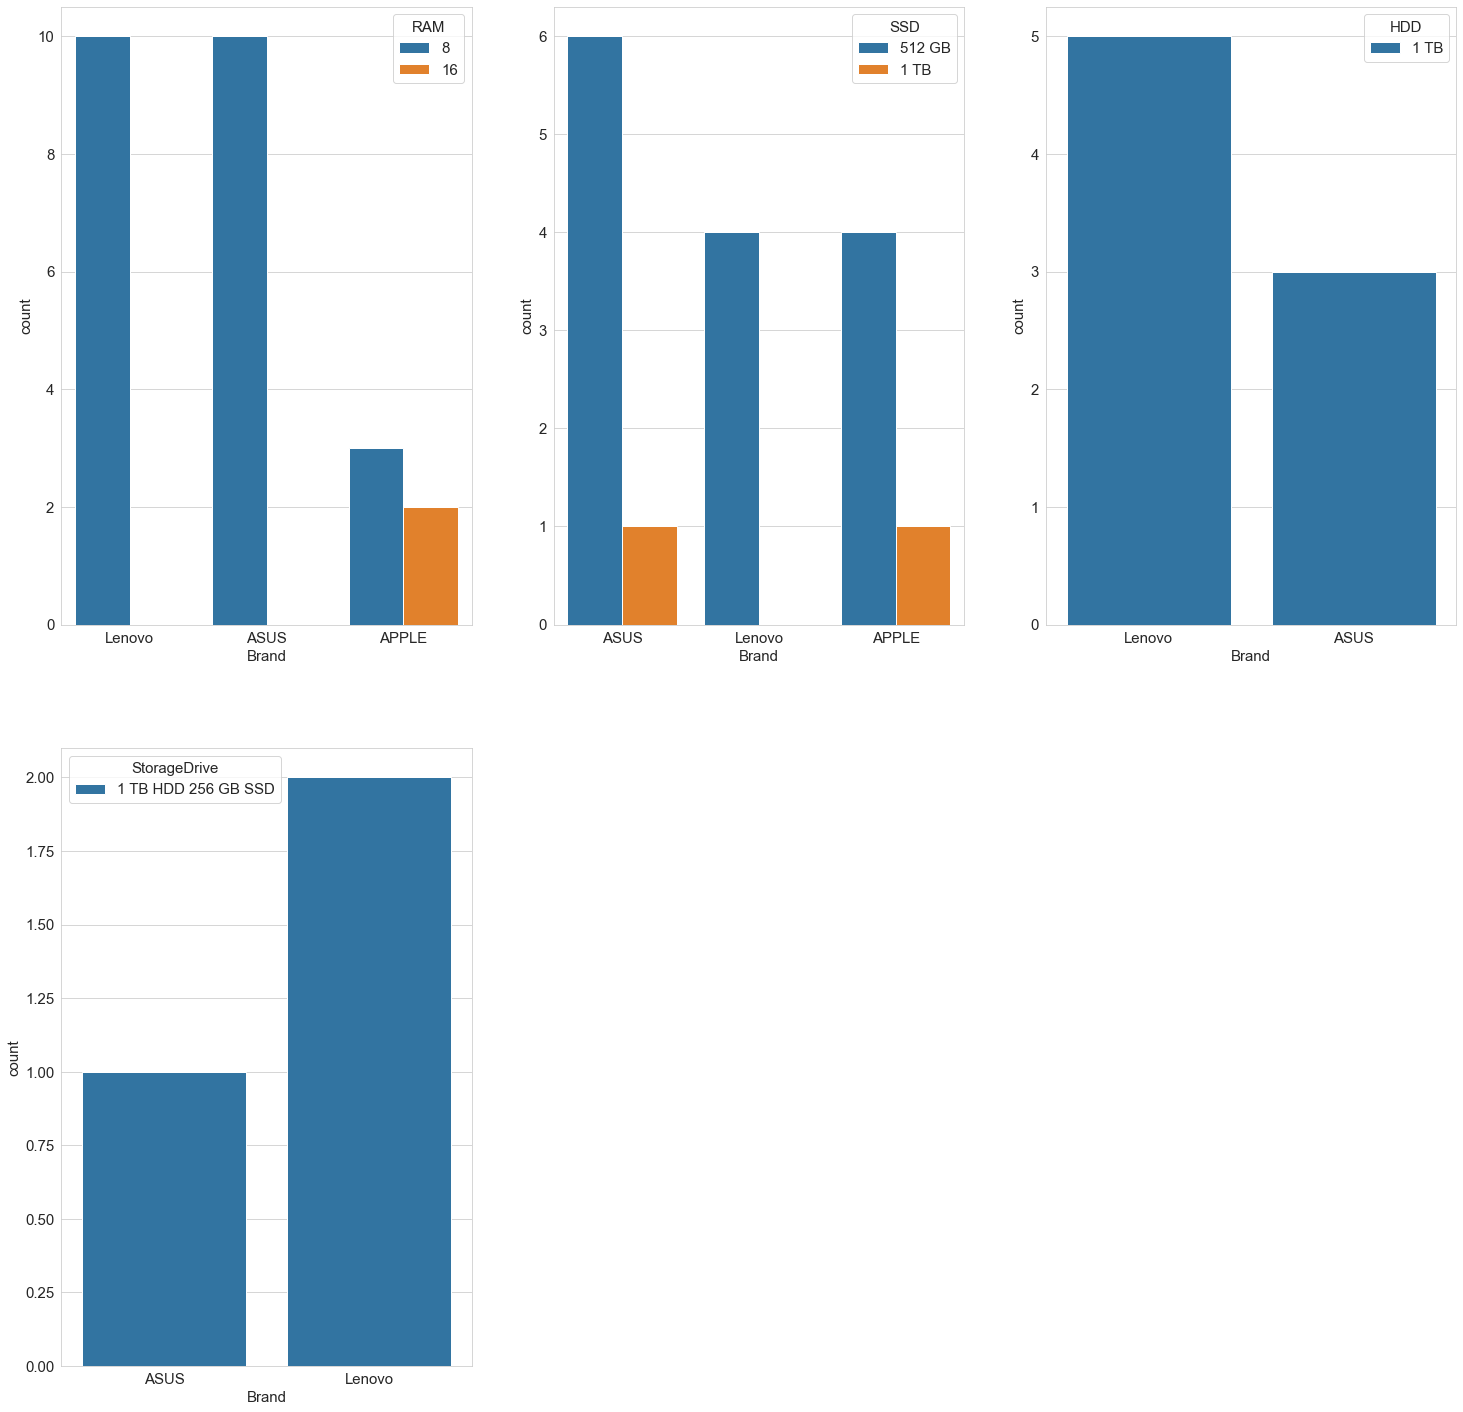

In [30]:
plt.figure(figsize=(25,25))
plt.subplot(231)
sbn.countplot(x="Brand",data=Top_3_i5_10th_Gen[Top_3_i5_10th_Gen["RAM"]>=8],hue="RAM")
plt.subplot(232)
sbn.countplot(x="Brand",data=Top_3_i5_10th_Gen[Top_3_i5_10th_Gen["HDD_GB"]==0],hue="SSD")
plt.subplot(233)
sbn.countplot(x="Brand",data=Top_3_i5_10th_Gen[Top_3_i5_10th_Gen["SSD_GB"]==0],hue="HDD")
plt.subplot(234)
sbn.countplot(x="Brand",data=Top_3_i5_10th_Gen[(Top_3_i5_10th_Gen["SSD_GB"]!=0) & (Top_3_i5_10th_Gen["HDD_GB"]!=0)],hue="StorageDrive")

#### From Aboove We Undersatnd That Lenovo and ASUS has equal No of Models having 8 GB Ram and Apple has 2 Models Which has RAM of >8 GB.

#### Lenovo and Apple have equal No of models who Have SSD only of 512 GB and ASUS and Apple have equal no of models which have SSD more than 512 GB But For SSD only ASUS has more counts compared to other two models

#### Looking Over HDD It Looks Like Apple doesnt Offer HDD and Lenovo Tops For Having HDD and there are some models of asus who have HDD more than 512 GB only .Lenovo Excels with  HDD more than 512 GB and SSD+HDD both with 1 TB HDD and 256 GB SSD if they offer both


#### From This We Can Say ASUS prefers More Focus on SSD only while Lenovo prefers more focus on HDD of 1 TB atleast and if they have SSD and HDD,the Min SSD is of 256 GB. 

#### If you prefer Models with 512 GB SSD and RAM 8 GB then Lenovo might be a option or ASUS can be Option
#### If You Prefer Models with >8 GB RAM then Apple might be you option
#### Lenevo Might be you option if you prefer RAM of 8 GB and 1 HDD or 1 HDD(atleast)+SSD(any size) since your prefernace is HDD

#### So We Analysed The Configurations of 3 Models and Just Overall guessed what our Options Might be If we are Looking Over laptops With 10th Gen i5 8 GB or More Ram and 512 GB or More SSD|HDD.

#### But We definately may or may not have budget and tht depends and cant say or interpret who may have this. 
#### But lets say we have a budget of atmost range of 70K. So Lets See The Original Price Distribution.

#### Mostly Everone is More Excited about Discounted Price But some do prefer Original Price if its Under Budget.

#### Lets See the Original Vs Discounted Price Distribution Of These 3 Models via Histogram,Box and Violin Plot

<AxesSubplot:ylabel='Frequency'>

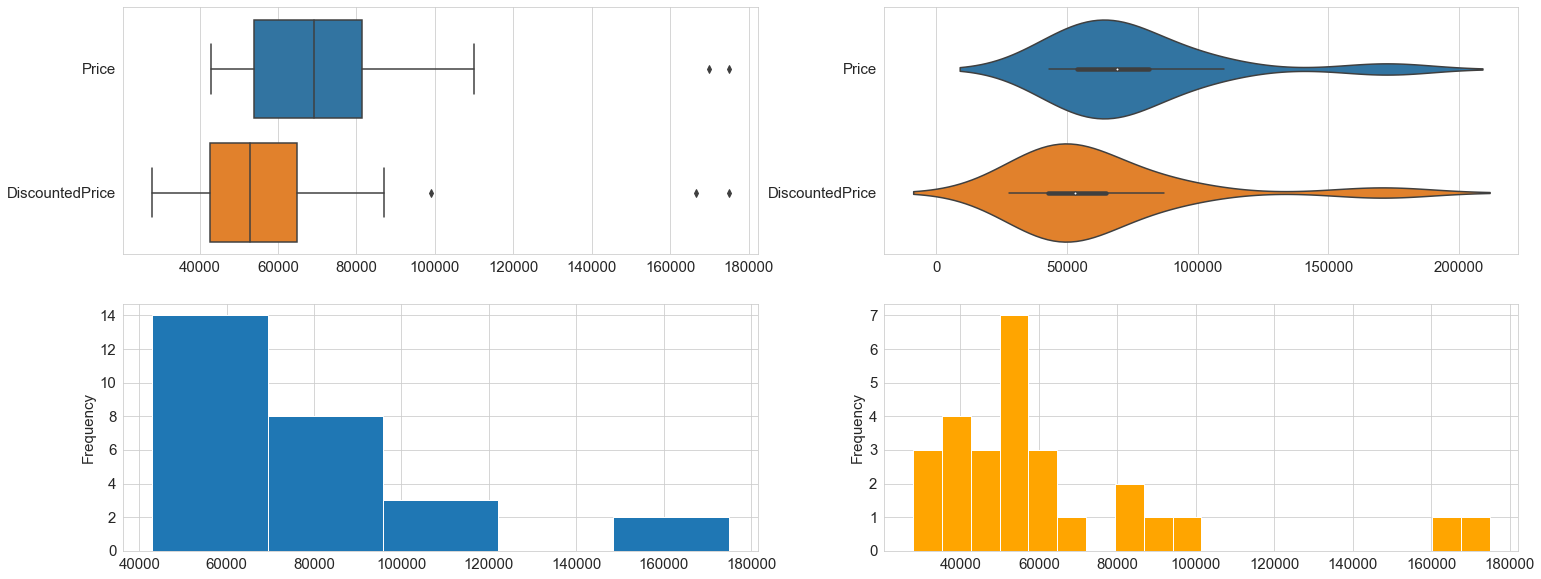

In [31]:
plt.figure(figsize=(25,10))
plt.subplot(221)
sbn.boxplot(data=Top_3_i5_10th_Gen[["Price","DiscountedPrice"]],orient="h")
plt.subplot(222)
sbn.violinplot(data=Top_3_i5_10th_Gen[["Price","DiscountedPrice"]],orient="h")
Top_3_i5_10th_Gen["Price"].plot(kind="hist",bins=5,ax=plt.subplot(223))
Top_3_i5_10th_Gen["DiscountedPrice"].plot(kind="hist",bins=20,ax=plt.subplot(224),color="orange")

#### From Aboove we Understand that Before Discount Most of The values Were Under our Budget 70 K but some were not and Post Discount Thet came in Range 41K to 63 K from 52 K 81 K. So AFter Discount the Overall Difference in Price Range Was 11 K approximately.


#### From Histogram also we Interpret that Before discount the Most prices were in range of 50K to 80 K. But Histogram is pretty scarsed to read so Box plot gives us precise info. In Box Plot We See Some Outliers Too But the reason for that is We have Apple laptops also so they begin from 100 K min so it might have affected the price range.

#### Violin Plot Is also similar like box but it gives idea of where most data is and also average price.So We see most of the data lies towards Min side before and after Discount and The Tail i too much skewed bcoz we have outliers


#### Now Lets Check How Many Model Lie Under our Budget. Lets Say our Budget is 70K.

In [32]:
UB_i5_10th=Top_3_i5_10th_Gen[Top_3_i5_10th_Gen["DiscountedPrice"]<70000]
UB_i5_10th.shape

(21, 18)

#### After Applying the Budget Filter We See that we lost Some items. So 6 Models Were Out Of Budget and My Guess is We Lost Apple Brand.

#### Lets Check

<AxesSubplot:xlabel='Brand', ylabel='count'>

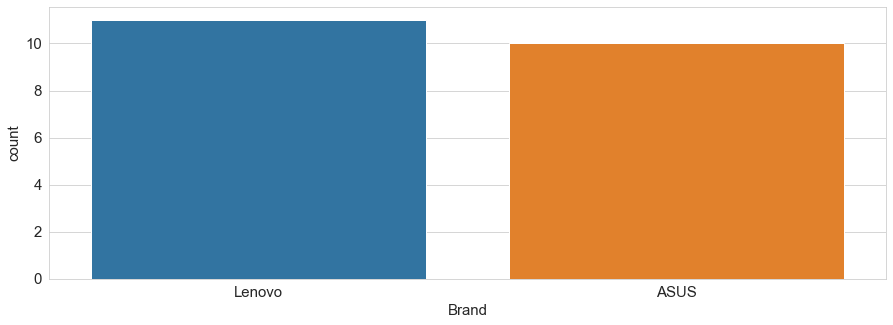

In [33]:
plt.figure(figsize=(15,5))
sbn.countplot(data=UB_i5_10th,x="Brand")

#### So We Lost 1 ASUS Model and As Expected All Apple Models. So Its Pretty Obvious That Apple is Not Pocket Firendly Unless you Have A Fat Purse. While It also look like all lenovo Model before Budget filter were Under Budget i.e Below 70K

#### Now The Outliers in Box Must Be Gone. lets Check again the price dist between two model,Now we might have good idea of whats the Price range

<AxesSubplot:>

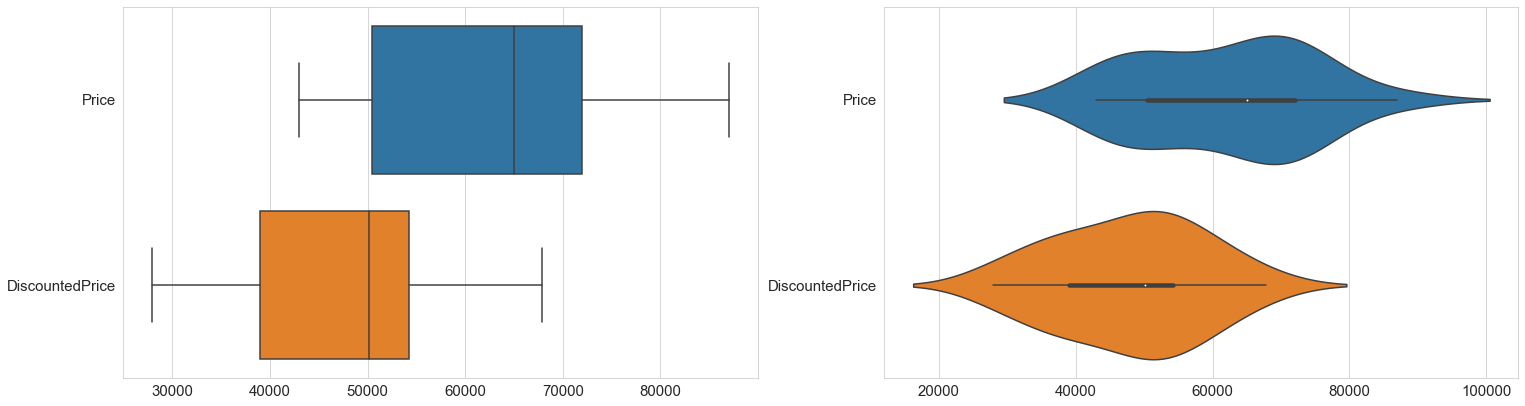

In [34]:
plt.figure(figsize=(25,15))
plt.subplot(221)
sbn.boxplot(data=UB_i5_10th[["Price","DiscountedPrice"]],orient="h")
plt.subplot(222)
sbn.violinplot(data=UB_i5_10th[["Price","DiscountedPrice"]],orient="h")

#### This is the Price Distribution. So now we can see that AFter Discount the range lies between 38K-54K from 51 K-72K,So Difference of 20 K between two Brands. So All laptops are Under Budget Post Discount

#### This Distribution Was For Two Barands Combined which Gave Idea that Whats the Range of all 2 brand models. But Now Lets Check The Average Price Distribution by Individual Brand using Pie

([<matplotlib.patches.Wedge at 0x1b19faee130>,
 [Text(-0.4024828227535646, 2.162870217416737, 'Lenovo'),
  Text(0.40248302525608737, -2.162870179733566, 'ASUS')],
 [Text(-0.21953608513830794, 1.1797473913182202, '55.86%'),
  Text(0.21953619559422946, -1.1797473707637631, '44.14%')])

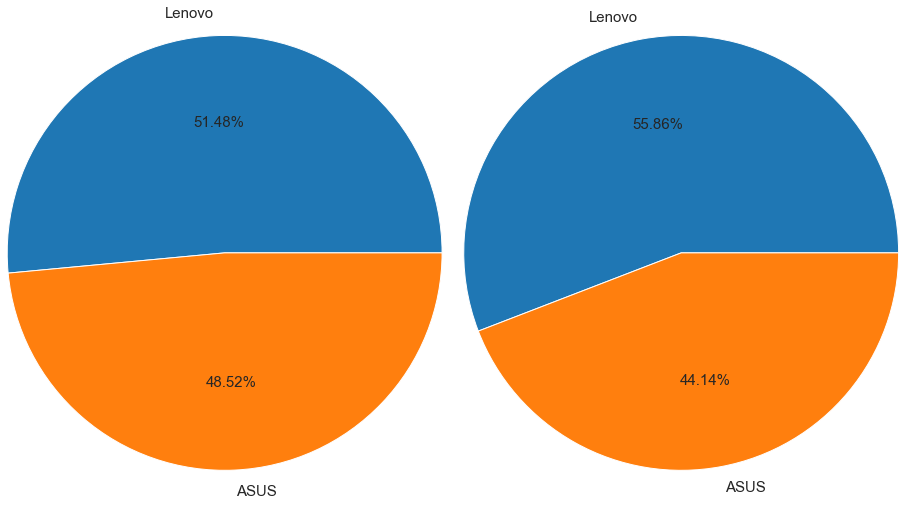

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.pie(UB_i5_10th.groupby(["Brand"])["Price"].mean(),autopct="%.2f%%",radius=2,labels=UB_i5_10th["Brand"].unique())
plt.subplot(122)
plt.pie(UB_i5_10th.groupby(["Brand"])["DiscountedPrice"].mean(),autopct="%.2f%%",radius=2,labels=UB_i5_10th["Brand"].unique())

#### First One Is Original Price and Second One is Discounted Price. Looking Over We Can See that ASUS is Lower in Price Before and After Discount Compared To Lenovo.

#### Now that we saw Price Distribution,Lets See Whcih Models are There.This time we will plot Discounted Prices only as our focus is on Discounted Prices

<AxesSubplot:xlabel='ModelName'>

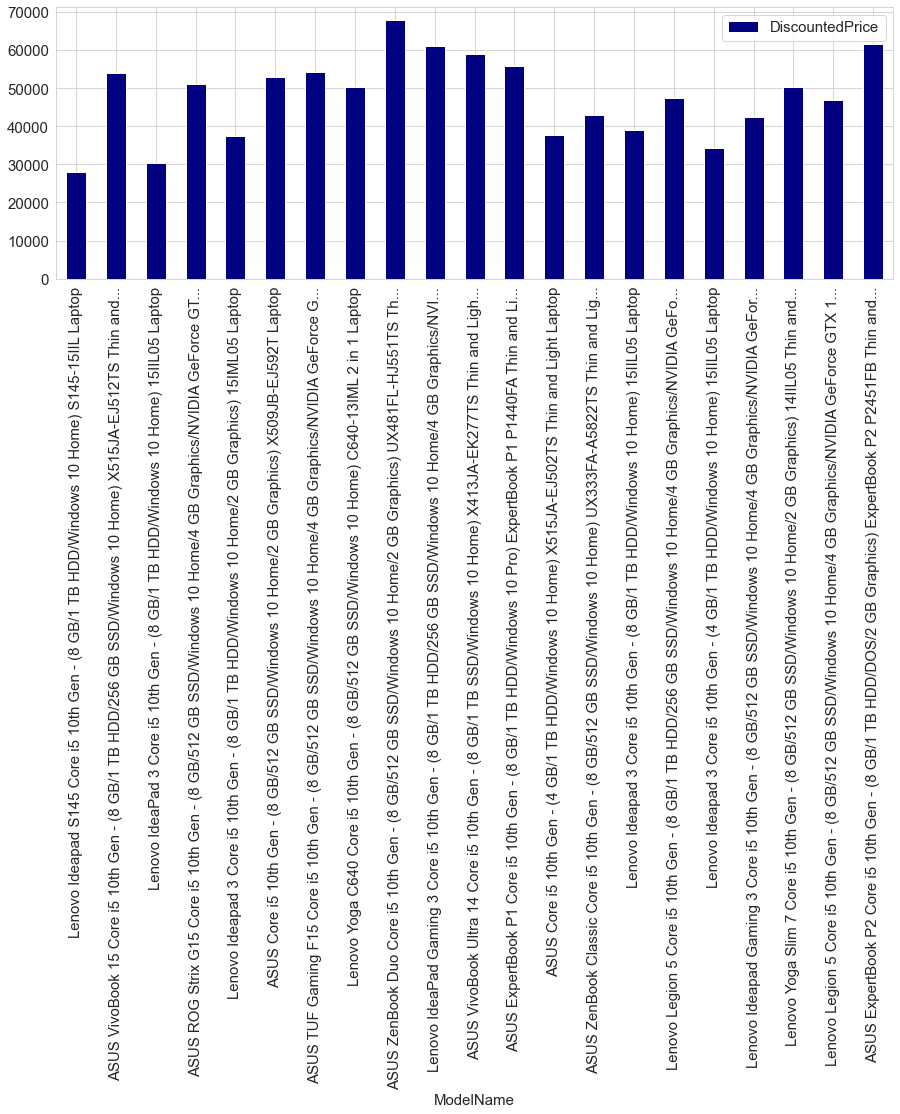

In [36]:
UB_i5_10th.plot(kind="bar",x="ModelName",y="DiscountedPrice",figsize=(15,5),color="navy")

#### Lets Check Both Brands Individually to get better idea

<AxesSubplot:xlabel='ModelName'>

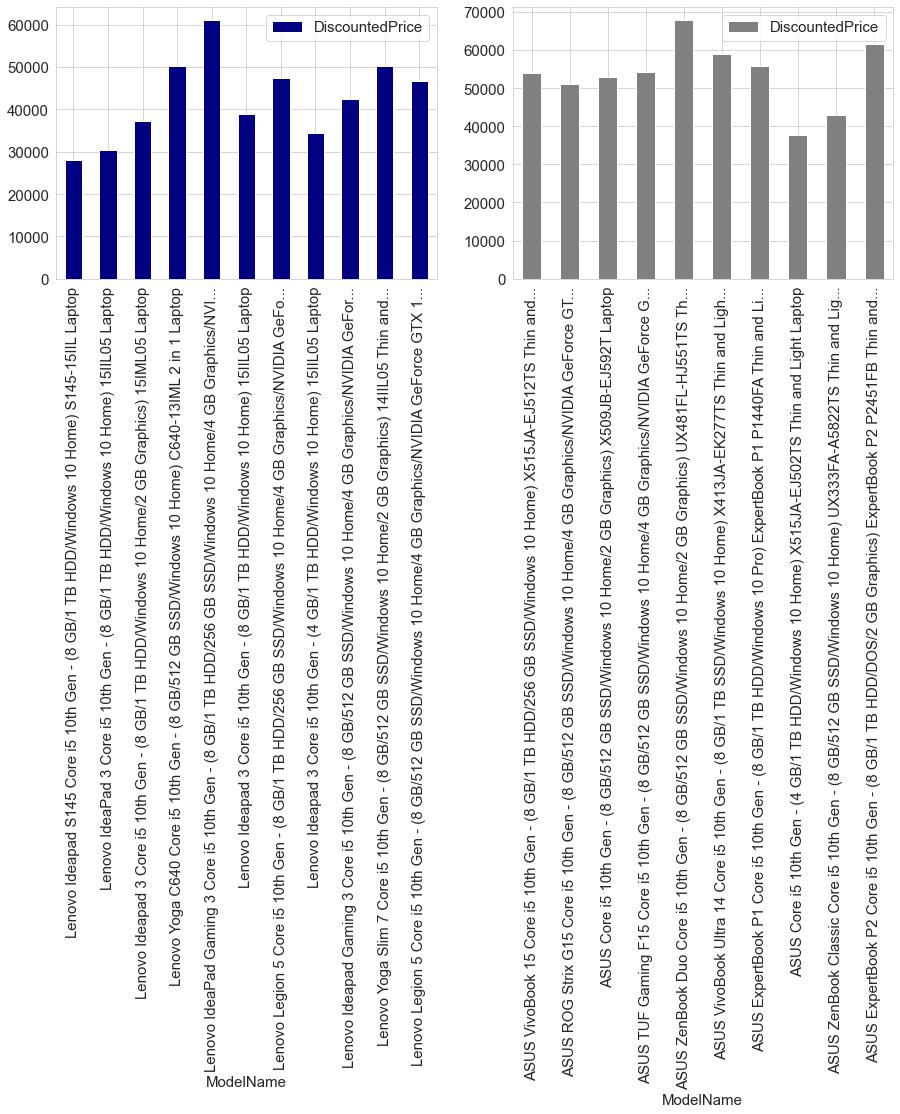

In [37]:
UB_i5_10th[UB_i5_10th["Brand"]=="Lenovo"].plot(kind="bar",x="ModelName",y="DiscountedPrice",figsize=(15,5),color="navy",ax=plt.subplot(121))
UB_i5_10th[UB_i5_10th["Brand"]=="ASUS"].plot(kind="bar",x="ModelName",y="DiscountedPrice",figsize=(15,5),color="gray",ax=plt.subplot(122))

#### We Saw aboove the shortlisted Brands and thier models which are in budget but lets Test RAM,OS,StorageDrive,Processor Brand,Graphic Card Brand Impact the Price or not Using Two way annova test.
- $H_O$:There is no Significant Impact Of RAM on Price
- $H_O$:There is no Significant Impact Of OS on Price
- $H_O$:There is no Significant Impact Of StorageDrive on Price
- $H_O$:There is no Significant Impact Of ProcessorBrand on Price
- $H_O$:There is no Significant Impact Of GraphicCardBrand on Price
- $H_O$:There is no Significant Impact Of Combination of any n columns on Price

In [122]:
np.random.seed(0)
flipkartPriceSample=flipkart.sample(30)
aov_price = pg.anova(dv='Price', between=["RAM","OS","StorageDrive","ProcessorBrand","GraphicCardBrand"], data=flipkartRatingSample,detailed=True)
aov_price[aov_price["p-unc"]<0.05]

C:\Users\Angat\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 5
  warnings.warn('covariance of constraints does not have full '
C:\Users\Angat\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 7
  warnings.warn('covariance of constraints does not have full '
C:\Users\Angat\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\Angat\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 4
  warnings.warn('covariance of constraints does not have ful

,Source,SS,DF,MS,F,p-unc,np2
0,RAM,8.592014e+11,3.0,2.864005e+11,234.196792,1.460895e-11,0.981833
2,StorageDrive,6.465943e+10,5.0,1.293189e+10,10.574726,3.211348e-04,0.802652
10,StorageDrive * ProcessorBrand,2.726391e+10,5.0,5.452781e+09,4.458875,1.381806e-02,0.631669
12,OS * GraphicCardBrand,1.932653e+11,2.0,9.663264e+10,79.018920,5.315357e-08,0.923993
16,RAM * OS * ProcessorBrand,8.238579e+10,3.0,2.746193e+10,22.456305,2.029963e-05,0.838246
22,RAM * ProcessorBrand * GraphicCardBrand,5.931810e+10,6.0,9.886349e+09,8.084314,8.725114e-04,0.788638
24,StorageDrive * ProcessorBrand * GraphicCardBrand,7.562075e+10,10.0,7.562075e+09,6.183697,5.162400e-03,0.826289
27,RAM * OS * ProcessorBrand * GraphicCardBrand,1.277261e+11,6.0,2.128769e+10,17.407474,2.352540e-05,0.889310
28,RAM * StorageDrive * ProcessorBrand * GraphicC...,1.515519e+12,30.0,5.051730e+10,41.309253,2.328676e-06,0.989619
29,OS * StorageDrive * ProcessorBrand * GraphicCa...,8.838801e+10,10.0,8.838801e+09,7.227708,1.184270e-03,0.847556


#### Looking Over test Results,aboove we see all the columns and combinations which impact price and among Them RAM itslef Impact Heavily on Price. More The RAM,More the Price May be and vice versa.

#### Looking Aboove,Lenovo Looks To Cheapest Compared To ASUS but cant say better than all

#### In ASUS,ASUS Core i5 is the cheapest but lenovo has better deals

#### Now We Got The Top Brands Which are Majorly displayed on flipkart which are affordable. But ratings also matter.So lets select Laptops which have rating aboove 4. Those are the laptops Which Suit This Recommendation for Config

## Note: This Table List could also be obtained by one simple command,But our Intent was to get Information from the products displayed,so thats why took Price filter and ratings filter seperately.
##### flipkart[((flipkart["Brand"]=="ASUS")|(flipkart["Brand"]=="Lenovo")|(flipkart["Brand"]=="APPLE")) & (flipkart["ProcessorBrand"]=="Intel") & (flipkart["ProcessorName"]=="Core i5") & (flipkart["ProcessorGeneration"]=="10th Gen") & ((flipkart["SSD_GB"]>=512)|(flipkart["HDD_GB"]>=512)) & (flipkart["DiscountedPrice"]<70000) & (flipkart["Ratings"]>=4)][["ModelName","Brand","DiscountedPrice","Ratings"]]

In [38]:
ratings_i5_10th=UB_i5_10th[UB_i5_10th["Ratings"]>=4]
ratings_i5_10th[["ModelName","Brand","DiscountedPrice","Ratings"]]

,ModelName,Brand,DiscountedPrice,Ratings
27,ASUS VivoBook 15 Core i5 10th Gen - (8 GB/1 TB...,ASUS,53990.00,4.3
39,Lenovo IdeaPad 3 Core i5 10th Gen - (8 GB/1 TB...,Lenovo,30353.10,4.3
72,ASUS ROG Strix G15 Core i5 10th Gen - (8 GB/51...,ASUS,51112.90,4.6
78,Lenovo Ideapad 3 Core i5 10th Gen - (8 GB/1 TB...,Lenovo,37337.44,4.1
82,ASUS Core i5 10th Gen - (8 GB/512 GB SSD/Windo...,ASUS,52910.20,4.2
116,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,ASUS,54269.28,4.8
124,Lenovo Yoga C640 Core i5 10th Gen - (8 GB/512 ...,Lenovo,50153.40,4.8
189,ASUS VivoBook Ultra 14 Core i5 10th Gen - (8 G...,ASUS,58990.00,4.5
228,Lenovo Ideapad 3 Core i5 10th Gen - (8 GB/1 TB...,Lenovo,38984.40,4.0
254,Lenovo Legion 5 Core i5 10th Gen - (8 GB/1 TB ...,Lenovo,47443.50,4.4


#### Lets See Average rating per Brand.This will gives a direction a bit which Brand is Better

([<matplotlib.patches.Wedge at 0x1b19fdc5670>,
 [Text(-0.07083418648611543, 2.1988593674959866, 'Lenovo'),
  Text(0.07083356886989627, -2.1988593873918254, 'ASUS')],
 [Text(-0.03863682899242659, 1.1993778368159926, '51.03%'),
  Text(0.03863649211085251, -1.1993778476682684, '48.97%')])

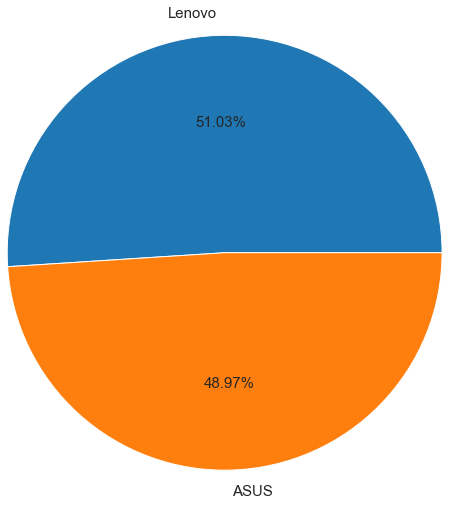

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.pie(ratings_i5_10th.groupby(["Brand"])["Ratings"].mean(),autopct="%.2f%%",radius=2,labels=UB_i5_10th["Brand"].unique())

#### Well Looks Like Lenovo is 2 percent more popular than ASUS and Most Of the Lenovo Brands are below 50 K which is AFfordable but doesnt rule than ASUS is to be not looked as the difference is very low so the comaprison here doesnt hold much value but tell that Lenovo is Bit Popular than ASUS.

#### But Depending on your Mode of work,ASUS may be better than lenovo or vice versa. So its better to compare and look Both. You Can Give priority To lenovo as its bit popular but looking over ASUS will also help more

# Recommended for Regular Mode Of Work(Like Shop Bill management and all that Stuff,Students(College projects,programming and Presentation,MS and etc),

##### For You SSD is Enough and SSD is more powerful and faster than HDD as HDD may slowdown pefromace over time(Unless You Have HDD and SSD both).HDD suits for people having High Professional Work Like Gamers,Game devs and etc. and 512 GB is enough if you have something thats for Personal Storage then ssd is sufficent and min of 512 GB and You Dont  Graphic Card but its advised to have it for safe side.if you have any work thats includes animation than Go with Gaming laptops type. If you have Low level of graphic work and you frequently dont do graphical work then >=4GB GC is enough but do go for NVIDIA(i.e you develp softwares than its okay but game development no i say)

###### Note: For gaming this is not a Good configuration,If you also intend for Gaming I Suggest To Look For Processor >i5 Storage >512 GB SSD|HDD and GC is Must of NVIDIA and Size >4 GB.Same Applies for the Work Of Graphics(Like game Development tasks)

In [40]:
ratings_i5_10th[["Brand","ModelName","DiscountedPrice","GraphicCardSize","GraphicCardBrand","Ratings","StorageDrive"]].sort_values(["DiscountedPrice"])

,Brand,ModelName,DiscountedPrice,GraphicCardSize,GraphicCardBrand,Ratings,StorageDrive
39,Lenovo,Lenovo IdeaPad 3 Core i5 10th Gen - (8 GB/1 TB...,30353.10,0.0,not mentioned,4.3,1 TB HDD
78,Lenovo,Lenovo Ideapad 3 Core i5 10th Gen - (8 GB/1 TB...,37337.44,2.0,not mentioned,4.1,1 TB HDD
228,Lenovo,Lenovo Ideapad 3 Core i5 10th Gen - (8 GB/1 TB...,38984.40,0.0,not mentioned,4.0,1 TB HDD
293,Lenovo,Lenovo Legion 5 Core i5 10th Gen - (8 GB/512 G...,46793.50,4.0,NVIDIA,4.4,512 GB SSD
254,Lenovo,Lenovo Legion 5 Core i5 10th Gen - (8 GB/1 TB ...,47443.50,4.0,NVIDIA,4.4,1 TB HDD 256 GB SSD
124,Lenovo,Lenovo Yoga C640 Core i5 10th Gen - (8 GB/512 ...,50153.40,0.0,not mentioned,4.8,512 GB SSD
277,Lenovo,Lenovo Yoga Slim 7 Core i5 10th Gen - (8 GB/51...,50243.30,2.0,not mentioned,4.1,512 GB SSD
72,ASUS,ASUS ROG Strix G15 Core i5 10th Gen - (8 GB/51...,51112.90,4.0,NVIDIA,4.6,512 GB SSD
82,ASUS,ASUS Core i5 10th Gen - (8 GB/512 GB SSD/Windo...,52910.20,2.0,not mentioned,4.2,512 GB SSD
27,ASUS,ASUS VivoBook 15 Core i5 10th Gen - (8 GB/1 TB...,53990.00,0.0,not mentioned,4.3,1 TB HDD 256 GB SSD


#### On Flipkart Website *Intel i5 10th gen 8GB RAM 512 GB SSD*  Config laptops Were displayed majorly and thats why we took this config in consideration fisrt. If You Wish To Make a Purchase in This Configuration then aboove are the Models from Top displayed Brands On Flipkart which are Pocket friendly. But To Narrow the table More below are the Recommendations that will be better than aboove. Either Choose from Aboove or below.Below One are With GC card  >=4GB and aboove are mixed.Depends on You whats on your mind.

#### You Can Also Have a Look with Same config but 11th Generation too but this time rather than plotting graphs seprately for Price and ratings,This time will do this together in one filter.

# Note:
### This Configuration is Strictly Not Suggested For Gaming. You can Play games no harm but go with GC Card option but still No use bcoz over the time approx after a year your laptop may start lagging in performance and 512 GB SSD wont hold much Games and if Space is more than 512 GB SSD then it will store but 4GB GC wont Hold for Long time.

In [41]:
ratings_i5_10th[(ratings_i5_10th["GraphicCardSize"]>=4) & (ratings_i5_10th["GraphicCardBrand"].str.startswith("not men")==False)][["Brand","ModelName","DiscountedPrice","GraphicCardSize","GraphicCardBrand","Ratings"]].sort_values(["DiscountedPrice"])

,Brand,ModelName,DiscountedPrice,GraphicCardSize,GraphicCardBrand,Ratings
293,Lenovo,Lenovo Legion 5 Core i5 10th Gen - (8 GB/512 G...,46793.50,4.0,NVIDIA,4.4
254,Lenovo,Lenovo Legion 5 Core i5 10th Gen - (8 GB/1 TB ...,47443.50,4.0,NVIDIA,4.4
72,ASUS,ASUS ROG Strix G15 Core i5 10th Gen - (8 GB/51...,51112.90,4.0,NVIDIA,4.6
116,ASUS,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,54269.28,4.0,NVIDIA,4.8


#### Just Out Of my curiousity, As we filtered out Laptops Via our Fitting Budget and Then selecting laptops with Good ratings,Lets Look Over ratings stats of all laptops which are and arent in our budget and check what feature impacts Good Or Bad ratings.

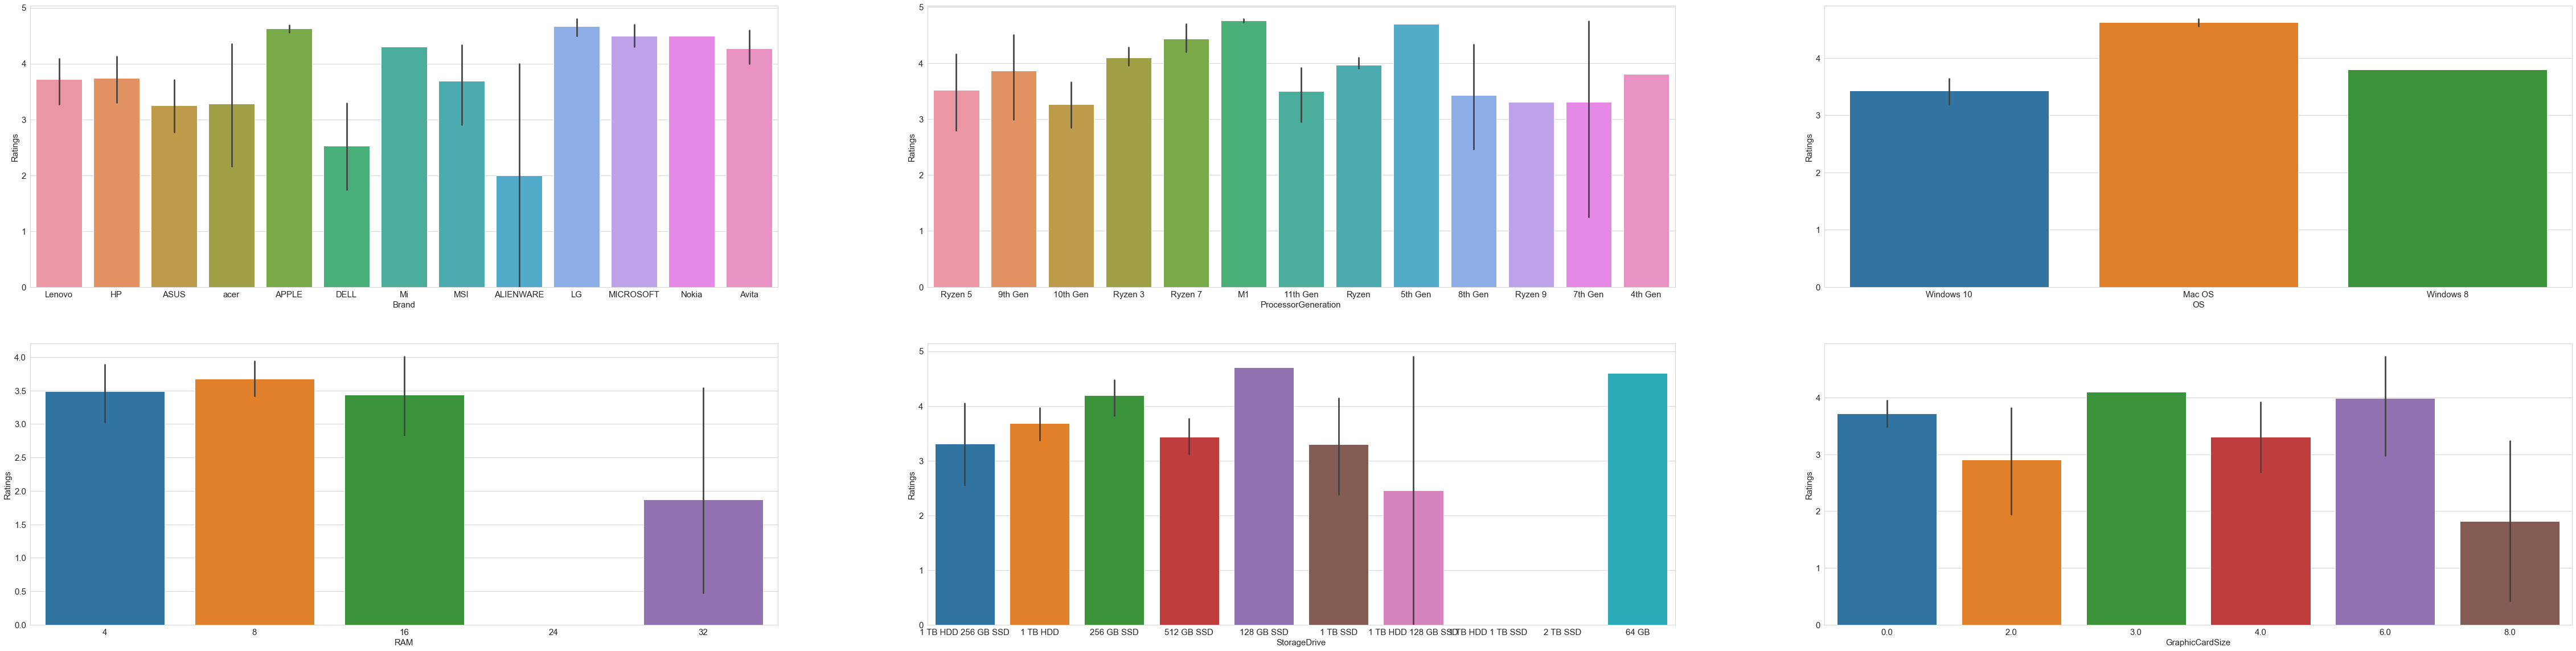

In [42]:
plt.figure(figsize=(80,20))
rating_factors=["Brand","ProcessorGeneration","OS","RAM","StorageDrive","GraphicCardSize"]
v=1
for i in rating_factors:
    plt.subplot(eval("23"+str(v)))
    sbn.barplot(x=i,y="Ratings",data=flipkart)
    v+=1

### So we See That That Apple Has Highest Ratings Of all regardless Under or over Budget, But One thing we get from this is Laptops If Having Famous Brand and If costly,it will have high ratings or vice versa if The ratings are good then obviously the Brand will be famous and may or may not be expensive.

### But we also see that M1,MacOs has highest ratings too so its quite inferable that since apple has highest ratings so thats why Apple Configuations with M1 gen and Os MacOs has High ratings.

In [43]:
flipkart[flipkart["Brand"]=="APPLE"][["Brand","ProcessorGeneration","OS","RAM","StorageDrive","GraphicCardSize"]].mode()

,Brand,ProcessorGeneration,OS,RAM,StorageDrive,GraphicCardSize
0,APPLE,M1,Mac OS,8,512 GB SSD,0.0


# Lets Use Two-Way Annova to check whether any of these feature columns impact  Column Ratings as like we did before for Price.
- $H_O$:There is no Significant Impact Of RAM on Ratings
- $H_O$:There is no Significant Impact Of OS on Ratings
- $H_O$:There is no Significant Impact Of StorageDrive on Ratings
- $H_O$:There is no Significant Impact Of ProcessorBrand on Ratings
- $H_O$:There is no Significant Impact Of GraphicCardBrand on Ratings
- $H_O$:There is no Significant Impact Of Combination of any n columns on Ratings

In [80]:
np.random.seed(0)
flipkartRatingSample=flipkart.sample(30)

In [114]:
aov = pg.anova(dv='Ratings', between=["RAM","OS","StorageDrive","ProcessorBrand","GraphicCardBrand"], data=flipkartRatingSample,detailed=True)

C:\Users\Angat\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 7
  warnings.warn('covariance of constraints does not have full '
C:\Users\Angat\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 8
  warnings.warn('covariance of constraints does not have full '
C:\Users\Angat\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\Users\Angat\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 4
  warnings.warn('covariance of constraints does not have ful

In [119]:
aov[aov["p-unc"]<0.05]

,Source,SS,DF,MS,F,p-unc,np2
22,RAM * ProcessorBrand * GraphicCardBrand,857.714832,6.0,142.952472,34.158297,3.152722e-07,0.940353
23,OS * ProcessorBrand * GraphicCardBrand,37.387369,2.0,18.693685,4.466830,3.337410e-02,0.407304
26,RAM * OS * StorageDrive * GraphicCardBrand,969.069066,30.0,32.302302,7.718591,6.171194e-03,0.946843
28,RAM * StorageDrive * ProcessorBrand * GraphicC...,1030.448961,30.0,34.348299,8.207479,4.953798e-03,0.949850
30,RAM * OS * StorageDrive * ProcessorBrand * Gra...,361.729702,30.0,12.057657,2.881161,3.354329e-02,0.869261


### So From aboove We See that For Ratings Are Much Impacted By RAM,ProcessorBrand and GraphicCard Brand. Better These Configuartions better the ratings will be. But all which are displayed aboove impact ratings,its just that RAM,ProcessorBrand and GraphicCard Brand have heavy impact on ratings.

##### So This Was The EDA for Finding various Information from products Displayed On Flipkart. I Did EDA for Brands by majorly displayed Configurations on flipkart *(Intel core i5 10th Gen 8 Gb RAM 512 GB SSD)* but we we took for >=8GB RAM >=512 GB SSD|HDD as more than 8GB RAm will be obviously good and same for storage also,more than 512 GB also will be good and we took this only for 10th gen only. If needed like we considered >8GB RAM >512 GB SSD|HDD,we could have considered 11th gen also alaong with 10th gen i.e (flipkart["gen"]=="10th gen | flipkart["gen"]=="11th gen") which could have given 11th gen also like >= *GB ram gave >8 GB ram data also.

##### The Purpose of this Analysis was to determine which Configuration is Majorly displayed on flipkart and from those configurations pick out the top 3 brands and from those brands pick out the pocket friendly models having ratings >=4 and then those models will be recommended to User for diff purposes(Like Regular Only or Gaming Only or Both)

##### This Same Analysis Could be Helpful For Flipkart To Determine On which Cnfiguration should they apply offers and what brands are in there so that offer could be appiled on them too. Offers releted to payment gateway and cashback,not discount as the products fetched from majorly displayed configuration are already taken which are below 70 K so offers could be if User opts for UPI,CC,DC or any other mode of payement or determining which mode is used a lot i.e if UPI is used more by customers then we can use this info to give cashback offers for UPI payement for making upi payements for products under majorly displayed configuration. Well This will require seprate analysis like what mode is used most and then intergrate the offer on that payment gateway and integrate with majorly displayed config product list and so on.



### Along with Majorly displayed Configs on flipkart,You Can similarly Analyse For Different Configurations Like:</i>

### 1.Intel Core i5 11th Gen >=8GB RAM >=512 GB SSD|HDD
### 2.Intel Core i7 10th Gen >=8GB RAM >=512 GB SSD|HDD
### 3.Intel Core i7 11th Gen >=8GB RAM >=512 GB SSD|HDD
### 4.Intel Core i9 10th Gen >=8GB RAM >=512 GB SSD|HDD
### 5.Intel Core i9 11th Gen >=8GB RAM >=512 GB SSD|HDD
### 6.AMD >=8GB RAM >=512 GB SSD|HDD

##### and So On and determine what configuration fits good for which purpose Gaming or regular Use and How is each better compared to other(Like i9 10th gen 16 GB RAM 1 TB SSD may be  better than i7 10th gen 16 GB RAM 1 TB SSD for Gaming or whatever based on cost or configurations depending how you consider the analysis. So You can Analyse. For Gaming I have Done as extra Part, You Can Try any no of filters and whatver you like and depends on you.


# NOTE:
# I Just Took EDA analysis for majorly displayed config only but in that too i considered >8GB RAm also >512 GB SSD|HDD aslo and only of 10th gen only,not 11th Gen
# So Similarly you can do same analysis for 10th as well as 11th with RAM>=8GB Storage >=512 GB SSD or HDD or Both. and also do analysis for aboove mentioned filters(i.e in 4th Line or point)

# Below is Extra Analysis which came in my mind and not linked or related to aboove One

# *============================================================*

# *EXTRA FACTORS FOR ANALYSIS*

## Lets Check Which Configuration and Brand is Best For Gaming.

#### In Gaming Most of The People Buy Alienware Brand or Look for Configurations that are latest in market. Nowdats HP,Lenovo,Dell and many more brands are Launchng Gaming Models too. But it all depends.


#### For A Gaming Laptop The Processor Must be of i7 or More,RAM>8GB,Storage SSD|HDD >512 GB,Graphic Card >4 GB(Which is equal to saying GC >=6 GB NVIDIA and most importantly the budget should be more than 80K mandatoryily. Since Gaming laptops are expensive you will have to remoove the Limits from Cost. 

#### Lets See if we can Find the Laptops with this configuration.

In [44]:
Gaming=flipkart[(flipkart["ProcessorBrand"]=="Intel") & (flipkart["ProcessorGeneration"].str.startswith("1")) & ((flipkart["ProcessorName"]=="Core i7")|(flipkart["ProcessorName"]=="Core i9")) & (flipkart["RAM"]>8) & ((flipkart["SSD_GB"]>512) | (flipkart["HDD_GB"]>512)) & ((flipkart["GraphicCardSize"]>4) & (flipkart["GraphicCardBrand"]!="not mentioned"))]
Gaming.shape

(11, 18)

#### So Aboove are the 11 Laptops For Gaming which Suits Best For gaming Criteria. This may be used for regular purpose also and infact would be better Option but for regular use only i wont suggest to spend this much as for regular Use you can See for Intel Intel 10th < i7 DiscPrice <70 K and space >=512 GB SSD which is shown aboove this config is already given and is recommended for regular use only

#### But With Gaming Laptops options aboove,You can also work on Garphical Works Like Graphic Designing,Development,Game Developments. So To add More This is Better recommendations for Companies with profile of Software Engineers,Game Developers/Freelancers, Animations, Film Industries(VFX,VR Graphic work),etc but not for college students looking for Regular work only

#### Since this is Gaming Then you will Need HDD>512 but more better if you use SSD only >512 or SSD and HDD both with either one of them having a Space of 1 TB. i.e if SSD is 512 or 128 or 256 Gb then HDD should be 1 Tb or vice versa and GC >4 or say minimum 6GB GC which is same as GC>4 when we say

#### Since gaming laptops are Expensive,We dont dont whats the min budget should be. I means it must be aboove 80K and atleast 100K but lets dig the ANS from here,lets see what this data says and whatever it says,that will be approx min budget for Gaming.

# Note:
#### 1.For majorly displayed Config i Took Analysis or eda for 10th gen only with RAM>8GB alsi storage >512 GB SSD|HDD also but didnt take 11th Gen data. But For Gaming I am taking 10th and 11th gen data as well as RAM >8 GB which will give all ram >8 GB to latest size RAM and SSD >512 Gb i.e 1 TB,2Tb and so on till latest.

#### 2.And This Time i am taking laptops With Zero ratings too as Gaming laptops are Very Expensive,So there may be products which are too much costly and they are purchased very rarely i.e By Very Popular professional Wealthly Gamers. So  Lets Consider Them Too

<AxesSubplot:xlabel='DiscountedPrice'>

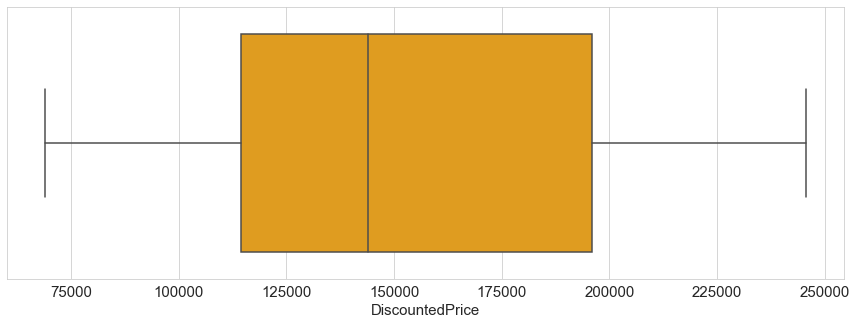

In [45]:
plt.figure(figsize=(15,5))
sbn.boxplot(data=Gaming,x="DiscountedPrice",color="orange")

#### As per Aboove Box Your Min Budget  Should Be around 140K if you aspire for gaming Laptops

#### Aboove we saw that, The Laptops fit best only for Gaming Purpose and the aboove table has i7 and i9 with 10th and 11th Gen Both i.e two processors as well as two generations. So Lets narrow the gaming recommendation by i7 and i9 for 10th and 11th gen seperately i.e Gaming Recommendation if you prefer i7 10th Gen,Gaming Recommendation if you prefer i9 10th gen,Gaming Recommendation if you prefer i7 11th gen and Gaming Recommendation if you prefer i9 11th gen. Anyways the aboove table is enough and no need for further analysis as such as user can select as per his wish but fractioned recommendation will be more accurate. You Can View all Gaming Laptops i.e i7 and i9 for 10th and 11th both aboove or view the table below if you prfer to look only for i7 or i9 with 10th or 11th gen. So now Lets Seperate i7 and i9 with 10th and 11th gen and analyse the same like we did analysis for majorly displayed configuration(Core i5 10th Gen >=8 GB RAM >=512 GB SSD and HDD)

#### Lets See Count For Brand,ProcessorsName,Gen,RAM,StorageDrive,GC Size,GC Brand. I mean We Did Take For Core i7 and i9 but now lets check how many brands with i7 and i9 seperately. Since Both Processors are good for gaming.


<AxesSubplot:xlabel='GraphicCardSize', ylabel='count'>

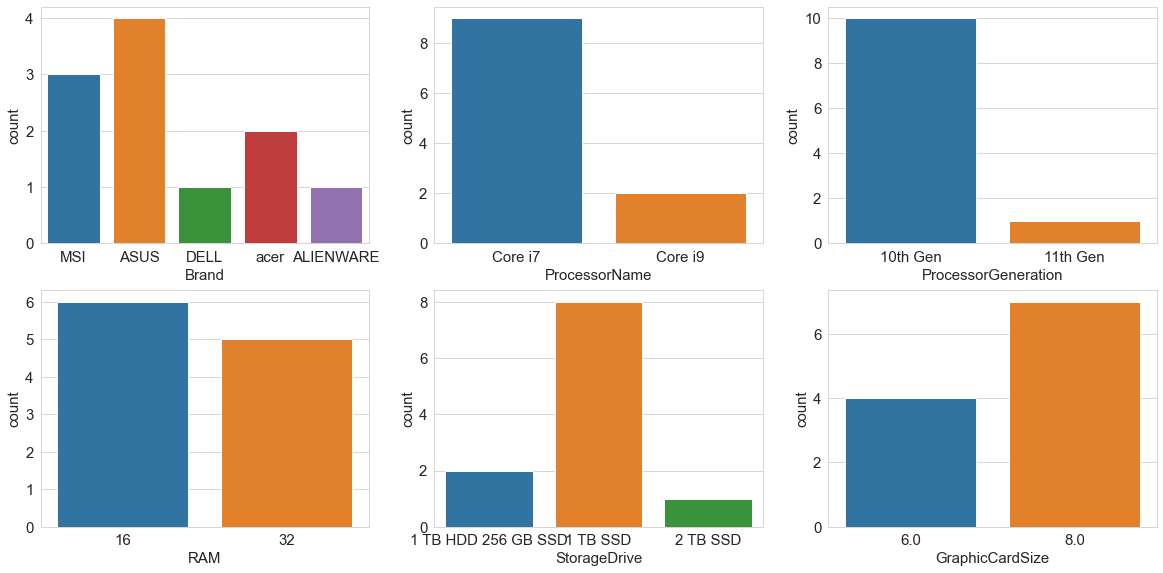

In [46]:
plt.figure(figsize=(20,20))
plt.subplot(431)
sbn.countplot(x="Brand",data=Gaming)
plt.subplot(432)
sbn.countplot(x="ProcessorName",data=Gaming)
plt.subplot(433)
sbn.countplot(x="ProcessorGeneration",data=Gaming)
plt.subplot(434)
sbn.countplot(x="RAM",data=Gaming)
plt.subplot(435)
sbn.countplot(x="StorageDrive",data=Gaming)
plt.subplot(436)
sbn.countplot(x="GraphicCardSize",data=Gaming)

#### From This Graph We Can Conclude That Most Of The Gaming laptops in List Have Intel i7 10th gen processor, 16 GB RAM 1TB SSD 8 GB NVIDIA GC but with this info combined we cant say for sure which brand has this all filters max Any Brand can have this filters and In That MSI And ACER have 3 and 2 Models while DEL and Alienware has One Model. ALinware Maybe the Expensive one and aboove 100K and so goes for DELL. and ASUS has Most Models so It can be ASUS,Lenovo,MSI or any brand that thas these config

#### But Now Lets  Check and See Via Different Processors i.e lets See How Many Brands Have i7 10th Gen >=16 GB RAM >=1 TB SSD and >=6 GB GC. Taking Greater Than 6 Bcoz 6 is min size of GC fo games and as we saw that More than whats high is always better unless its below min req criteria and back then we compared i5 Config with 8gb ram only and >8 Gb Ram. so this time to just to have idea of How many Brands have only 16 GB RAM,1 TB SSD only and 8 GB GC only we plot that graph but in reality we are also  more intrested in brands having >16 GB RAM,>512 GB SSD as well as HDD and GC >6 too also which can be obtained by >= sign. 

#### And After Analysing i7 Same Analysis for i9 also we will do,so that we can show sepearte table for gaming i7 and i9 Laptops

#### Lets See

# Note:
#### Here we see that 8 Gb GC has highest Counts,so by rule we take >=8 but here we will take 6 also bcoz for Gaming req for Gc size is min 6 GB so no harm in taking 6 also and even if you take >=8 or >6 GB no issues.. its just that 6 GB is min size,thats why we take. If 8 GB was min req of Gc then we wouldnt have taken 6 no matter if it had high count, i mean we would have taken >=6 but in the end we would filter as >6 or >=8 and not take 6 as 8 would be min req..so similarly like we did for min storage(i.e 512 GB in regular purpose),we take here i.e 6 GB GC is min req for gaming.

In [47]:
Gaming[(Gaming["ProcessorName"]=="Core i7") & (Gaming["ProcessorGeneration"]=="10th Gen") & (Gaming["RAM"]==16) & (Gaming["SSD_GB"]==1024) & (Gaming["GraphicCardSize"]==8)]

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Ratings,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
162,acer,acer Predator Core i7 10th Gen - (16 GB/1 TB S...,Intel,Core i7,10th Gen,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,8.0,0.0,154990,29.0,110042.9,1024.0,0.0
234,ALIENWARE,ALIENWARE Core i7 10th Gen - (16 GB/1 TB SSD/W...,Intel,Core i7,10th Gen,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,8.0,4.0,243990,16.0,204951.6,1024.0,0.0


#### So Aboove are the laptops if you prefer i7 16 GB RAM 1 TB SSD and GC of size 8. So These laptops would proove Good Recommendation than one having 6 Gb GC. But we know that 6 Gb Gc is Min so we have to  take 6 Gb also.

#### Lets Check For >16 GB RAM,>512 GB SSD and HDD and >=6 GB GC for i7 Processors. But as we did for Majorly displayed config i.e plot price distribution first to get idea of avg price and then show  Model table (i.e Recommendation for that cateogory configuration). So Same we will do for i7 and i9 seperately.

# Note:
#### Taking 6GB GC Because its the minimum requirement.

#### Now Lets See What Models Are There in i7 which is also our recommendation if we prefer Gaming laptop with i7

In [48]:
i7_Gaming_10th=Gaming[(Gaming["ProcessorName"]=="Core i7") & (Gaming["ProcessorGeneration"]=="10th Gen") & (Gaming["RAM"]>=16) & ((Gaming["SSD_GB"]>=1024)|(Gaming["HDD_GB"]>=1024)) & (Gaming["GraphicCardSize"]>=6)]
i7_Gaming_10th

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Ratings,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
44,MSI,MSI GP65 Leopard Core i7 10th Gen - (16 GB/1 T...,Intel,Core i7,10th Gen,Windows 10,16,1 TB,256 GB,1 TB HDD 256 GB SSD,NVIDIA,6.0,4.7,99990,31.0,68993.10,256.0,1024.0
162,acer,acer Predator Core i7 10th Gen - (16 GB/1 TB S...,Intel,Core i7,10th Gen,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,8.0,0.0,154990,29.0,110042.90,1024.0,0.0
234,ALIENWARE,ALIENWARE Core i7 10th Gen - (16 GB/1 TB SSD/W...,Intel,Core i7,10th Gen,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,8.0,4.0,243990,16.0,204951.60,1024.0,0.0
241,ASUS,ASUS Core i7 10th Gen - (32 GB/1 TB SSD/Window...,Intel,Core i7,10th Gen,Windows 10,32,0,1 TB,1 TB SSD,NVIDIA,6.0,0.0,224990,17.0,186741.70,1024.0,0.0
257,MSI,MSI GE66 Raider Core i7 10th Gen - (32 GB/1 TB...,Intel,Core i7,10th Gen,Windows 10,32,0,1 TB,1 TB SSD,NVIDIA,8.0,5.0,194990,4.0,187190.40,1024.0,0.0
260,acer,acer Predator Helios 300 Core i7 10th Gen - (1...,Intel,Core i7,10th Gen,Windows 10,16,1 TB,256 GB,1 TB HDD 256 GB SSD,NVIDIA,6.0,4.6,116990,22.0,91252.20,256.0,1024.0
301,ASUS,ASUS ROG Zephyrus S15 Core i7 10th Gen - (32 G...,Intel,Core i7,10th Gen,Windows 10,32,0,1 TB,1 TB SSD,NVIDIA,8.0,0.0,199989,38.0,123993.18,1024.0,0.0
334,MSI,MSI Creator 17 Core i7 10th Gen - (32 GB/1 TB ...,Intel,Core i7,10th Gen,Windows 10,32,0,1 TB,1 TB SSD,NVIDIA,8.0,0.0,264990,15.0,225241.50,1024.0,0.0


#### So The Models Aboove Suit Best For Gaming laptops with i7 10th gen to say precisely

#### So Lets Check The Price Distribution Of i7 Laptops for this

<AxesSubplot:xlabel='DiscountedPrice'>

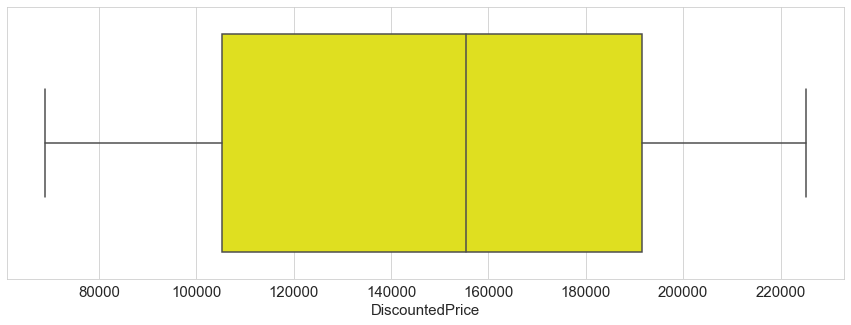

In [49]:
plt.figure(figsize=(15,5))
sbn.boxplot(data=i7_Gaming_10th,x="DiscountedPrice",color="yellow")

#### Laptops with i7 Processor have a Average Price of around 155K. This means to have a gaming laptop with i7 Processor 10th Gen, You Budget should be more than 100K as Gaming Laptops are Expensive and to be more accurate they are aboove 100K and Yes they are superly efficient and faster than any computers in processing.

#### Now lets See For i9 10th Gen.So lets Check the price distribution.

In [50]:
i9_Gaming_10th=Gaming[(Gaming["ProcessorName"]=="Core i9") & (Gaming["ProcessorGeneration"]=="10th Gen") & (Gaming["RAM"]>=16) & ((Gaming["SSD_GB"]>=1024)|(Gaming["HDD_GB"]>=1024)) & (Gaming["GraphicCardSize"]>=6)]
i9_Gaming_10th

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Ratings,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
126,DELL,DELL G7 Core i9 10th Gen - (16 GB/1 TB SSD/Win...,Intel,Core i9,10th Gen,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,8.0,5.0,179990,20.0,143992.0,1024.0,0.0
168,ASUS,ASUS ROG Strix Scar 17 Core i9 10th Gen - (32 ...,Intel,Core i9,10th Gen,Windows 10,32,0,2 TB,2 TB SSD,NVIDIA,8.0,0.0,269990,9.0,245690.9,2048.0,0.0


#### So For i9 10th gen,we have only two Models.So no need to plot. But Looking Over the discounted costs of both there is a diff of 100K . So If u Want i9 Gaming Laptop then you budget should be atleast 150K. And One Laptop is Superior to Dell and thats ASUS and also has RAM And Storage which is jaw dropping but its is Very Very very Costly. And thats why the ratings are zero as no one has bought or rare purchases and that too no one is rating it. So The ASUS laptop looks like Rolls Royce.lol

#### But Lets Check This Precisely,I mean take only i9 and 10th Gen and Price>80K. so that we can check the avergae more precsiely.

#### So Same Records,So No use of Plotting(i.e When Taken from Flipkart which has all laptops,the ans is same as aboove so no use).

#### But Looking Over these Two,Lets call This that To Purchase laptops with i9 10th Gen Your min budget should be 175K. Because i9 is the latest and wanting a gaming laptop,You shouldnt have a price limit or budget.i mean not below atleast 175 K.


#### So Finally Recommendation for i9 10th laptops is the aboove table

In [51]:
i7_Gaming_11th=Gaming[(Gaming["ProcessorName"]=="Core i7") & (Gaming["ProcessorGeneration"]=="11th Gen") & (Gaming["RAM"]>=16) & ((Gaming["SSD_GB"]>=1024)|(Gaming["HDD_GB"]>=1024)) & (Gaming["GraphicCardSize"]>=6)]
i7_Gaming_11th

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Ratings,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
88,ASUS,ASUS TUF Dash F15 (2021) Core i7 11th Gen - (1...,Intel,Core i7,11th Gen,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,6.0,5.0,128990,8.0,118670.8,1024.0,0.0


#### Looking At This laptop Model,The Aboove laptop also is Best fit. But in 10th gen we saw that the GC size was 8 GB and here the GC size is 6Gb which is acceptable and no issues as 6 is the min size to play games. But I am uncertain whether the 11th gen does make any sense or not ? maybe this is 11th gen Laptop.. It may be that i7 11th Gen 16GB RAM 1TB SSD|HDD 6GB GC have eqivalent or more better performance than i7 10th Gen 16GB RAM 1TB SSD|HDD 8GB GC. Who Knows? ANd this price 118 K is also fitting. For i7 10th gen laptops the avg price is 107 K or say min 107 K should be your budget and aboove laptop is 118 K so doesnt matter or make any difference go for 10th or 11th Gen, Just that 11th gen might have litlle bit better performance than 10th Gen.

#### Lets Look For i9 Now.

In [52]:
i9_Gaming_11th=Gaming[(Gaming["ProcessorName"]=="Core i9") & (Gaming["ProcessorGeneration"]=="11th Gen") & (Gaming["RAM"]>=16) & ((Gaming["SSD_GB"]>=1024)|(Gaming["HDD_GB"]>=1024)) & (Gaming["GraphicCardSize"]>=6)]
i9_Gaming_11th

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Ratings,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB


#### Well It Seems we have reached the dead end of latest config.i.e i9 is latest and 11th gen is latest.. Looks Like Gaming laptops in this config are yet to come.


## SO TO CONCLUDE,FOR GAMING LAPTOPS THE ANALYSIS IS OVER AND ABOOVE ARE THE RECOMMENDATIONS FOR GAMING LAPTOPS AND FOR GAMING ONLY. FOR REGULAR THE PRICES ARE EXPENSIVE AND NO NEED TO SPEND THIS MUCH.

## Gaming dataset has both i7 and i9,User can Look here to get both config laptops and choose. But To Seperate Then:
#### look over i7_gaming_10th if you prefer i7 and 10th gen
#### look over i7_gaming_11th if you prefer i7 and 11th gen
#### look over i9_gaming_10th if you prefer i9 and 10th gen
#### look over i9_gaming_11th if you prefer i9 and 11th gen.


# Note:
#### Since You have decided to buy gaming Laptop,It is mandatory to know what configurations gaming Laptop has before buying and no price limit must be there. For eg. You Must Know that If i have to Look gaming laptop then I should look over i7or i9 10th or 11th gen and RAM>8GB,Storage >512 GB SSD or HDD or SSD and HDD both and GC >4 Gb or say GC>=6(i.e as 6 GB GC is the min req for gaming) Gb Nvidia and price budget should be atleast 150K. These should be your configuration if u want gaming laptop nothing below this one(i.e Core i5 10th or 11th gen Ram<16 GB Storage <1 TB SSD or HDD) otherwise that config is not recommended for Gaming strictly and sugessted only for regular use Only as shown for recommendation for regular use.

#### Lets See Which laptop and its Brand is Most Expensive and Highest of all on flipkart

In [53]:
flipkart[flipkart["DiscountedPrice"]==flipkart["DiscountedPrice"].max()]

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Ratings,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
168,ASUS,ASUS ROG Strix Scar 17 Core i9 10th Gen - (32 ...,Intel,Core i9,10th Gen,Windows 10,32,0,2 TB,2 TB SSD,NVIDIA,8.0,0.0,269990,9.0,245690.9,2048.0,0.0


#### The Aboove Model has The Highest Price And Fits Best For Gaming Category. So If You Prefer A laptop With Good Latest config For Gaming Only and Price is not your considertaion but configurations are then This is Best Fit For Gaming Only. And You Do All the work which requires gaming Configuration. But Difference is this is Very Very expensive,So if u are a popular well big shot Entity,You can opt for this and this also surpasses the suggestion given aboove for gaming(i.e i7 and i9 one) in processor,Storage,RAM:)

#### But there is No rating for this,It may be that this laptop is Very expensive,No One has Bought it and thats why no reviews.

#### Lets See which Laptop and its Brand is most lowest and cheapest of all

In [54]:
flipkart[flipkart["DiscountedPrice"]==flipkart["DiscountedPrice"].min()]

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Ratings,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
289,Avita,Avita Cosmos 2 in 1 Celeron Dual Core - (4 GB/...,Intel,Celeron,10th Gen,Windows 10,4,0,0,64 GB,not mentioned,0.0,4.6,17990,23.0,13852.3,0.0,0.0


#### The Aboove Brand and model is most cheapest and also has good ratings but it doesnt contain HDD or SSD,It may contain different storage which is internal and different from HDD and SSD. So if you have something to go very low on price this may be you option.

#### Lets See which Laptop Has Highest Ratings on flipkart

In [55]:
flipkart[flipkart["Ratings"]==flipkart["Ratings"].max()]

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Ratings,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
18,DELL,DELL Inspiron Core i3 10th Gen - (8 GB/256 GB ...,Intel,Core i3,10th Gen,Windows 10,8,0,256 GB,256 GB SSD,not mentioned,0.0,5.0,40707,0.0,40707.0,256.0,0.0
81,ASUS,ASUS ROG Strix G17 Core i7 10th Gen - (16 GB/5...,Intel,Core i7,10th Gen,Windows 10,16,0,512 GB,512 GB SSD,NVIDIA,6.0,5.0,101990,7.0,94850.7,512.0,0.0
88,ASUS,ASUS TUF Dash F15 (2021) Core i7 11th Gen - (1...,Intel,Core i7,11th Gen,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,6.0,5.0,128990,8.0,118670.8,1024.0,0.0
126,DELL,DELL G7 Core i9 10th Gen - (16 GB/1 TB SSD/Win...,Intel,Core i9,10th Gen,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,8.0,5.0,179990,20.0,143992.0,1024.0,0.0
149,ASUS,ASUS ROG Strix G15 (2020) Core i7 10th Gen - (...,Intel,Core i7,10th Gen,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,4.0,5.0,92990,20.0,74392.0,1024.0,0.0
152,ASUS,ASUS ROG Strix G15 Ryzen 5 Hexa Core 5600H - (...,AMD,Ryzen 5Core 5600H,Ryzen 5,Windows 10,16,0,512 GB,512 GB SSD,NVIDIA,4.0,5.0,92990,16.0,78111.6,512.0,0.0
166,ASUS,ASUS ROG Flow X13 Ryzen 7 Octa Core 5800HS - (...,AMD,Ryzen 7Core 5800HS,Ryzen 7,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,4.0,5.0,124990,23.0,96242.3,1024.0,0.0
222,ASUS,ASUS VivoBook S S14 Core i5 11th Gen - (8 GB +...,Intel,Core i5,11th Gen,Windows 10,8,0,512 GB,512 GB SSD,not mentioned,0.0,5.0,62990,23.0,48502.3,512.0,0.0
257,MSI,MSI GE66 Raider Core i7 10th Gen - (32 GB/1 TB...,Intel,Core i7,10th Gen,Windows 10,32,0,1 TB,1 TB SSD,NVIDIA,8.0,5.0,194990,4.0,187190.4,1024.0,0.0
269,ASUS,ASUS ExpertBook B9 Core i7 10th Gen - (16 GB/1...,Intel,Core i7,10th Gen,Windows 10,16,0,1 TB,1 TB SSD,not mentioned,0.0,5.0,154990,10.0,139491.0,1024.0,0.0


#### Lets See The Price Distribution Of Laptops which has Max ratings

<AxesSubplot:xlabel='DiscountedPrice'>

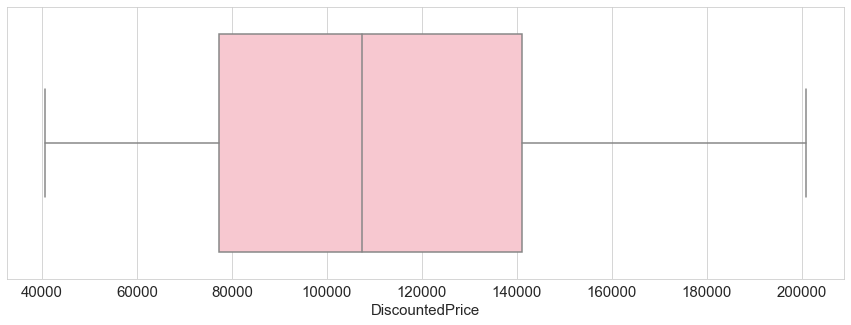

In [56]:
plt.figure(figsize=(15,5))
sbn.boxplot(data=flipkart[flipkart["Ratings"]==flipkart["Ratings"].max()],x="DiscountedPrice",color="pink")

#### Laptops With Highest Ratings i.e 5, Have Average price of around 108K and Lies in the range of 78K-141K. So laptops With Highest ratings are definately expensive and may have latest processors like i7 or i9 and RAM>=8GB Storage >=512 GB SSD|HDD. But the things is Laptops with 5 as ratings are definately expensive as shown aboove

#### Laptops with Lowest ratings i.e 0

In [57]:
flipkart[flipkart["Ratings"]==flipkart["Ratings"].min()]

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Ratings,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
0,Lenovo,Lenovo IdeaPad Gaming Ryzen 5 Hexa Core 4600H ...,AMD,Ryzen 5Core 4600H,Ryzen 5,Windows 10,8,1 TB,256 GB,1 TB HDD 256 GB SSD,NVIDIA,4.0,0.0,63990,26.0,47352.60,256.0,1024.0
15,Lenovo,Lenovo IdeaPad Core i3 11th Gen - (8 GB/512 GB...,Intel,Core i3,11th Gen,Windows 10,8,0,512 GB,512 GB SSD,not mentioned,0.0,0.0,61790,0.0,61790.00,512.0,0.0
68,ASUS,ASUS VivoBook Ultra K14 (2021) Core i3 11th Ge...,Intel,Core i3,11th Gen,Windows 10,8,0,512 GB,512 GB SSD,not mentioned,0.0,0.0,56990,0.0,56990.00,512.0,0.0
122,ASUS,ASUS ROG Strix G15 Core i7 10th Gen - (16 GB/5...,Intel,Core i7,10th Gen,Windows 10,16,0,512 GB,512 GB SSD,NVIDIA,4.0,0.0,86990,0.0,86990.00,512.0,0.0
138,DELL,DELL Inspiron Core i5 11th Gen - (8 GB/1 TB HD...,Intel,Core i5,11th Gen,Windows 10,8,1 TB,256 GB,1 TB HDD 256 GB SSD,not mentioned,2.0,0.0,68409,0.0,68409.00,256.0,1024.0
141,ALIENWARE,ALIENWARE Core i7 9th Gen - (16 GB/1 TB HDD/1 ...,Intel,Core i7,9th Gen,Windows 10,16,1 TB,1 TB,1 TB HDD 1 TB SSD,not mentioned,8.0,0.0,209990,35.0,136493.50,1024.0,1024.0
142,ASUS,ASUS ZenBook Duo Core i5 10th Gen - (8 GB/512 ...,Intel,Core i5,10th Gen,Windows 10,8,0,512 GB,512 GB SSD,not mentioned,2.0,0.0,86990,22.0,67852.20,512.0,0.0
150,HP,HP Core i5 11th Gen - (8 GB + 32 GB Optane/512...,Intel,Core i5,11th Gen,Windows 10,8,0,512 GB,512 GB SSD,not mentioned,0.0,0.0,55490,6.0,52160.60,512.0,0.0
156,Lenovo,Lenovo IdeaPad Gaming 3 Core i5 10th Gen - (8 ...,Intel,Core i5,10th Gen,Windows 10,8,1 TB,256 GB,1 TB HDD 256 GB SSD,NVIDIA,4.0,0.0,64990,6.0,61090.60,256.0,1024.0
158,HP,HP G Series Core i3 10th Gen - (4 GB/512 GB SS...,Intel,Core i3,10th Gen,Windows 10,4,0,512 GB,512 GB SSD,not mentioned,0.0,0.0,39990,9.0,36390.90,512.0,0.0


<AxesSubplot:xlabel='DiscountedPrice'>

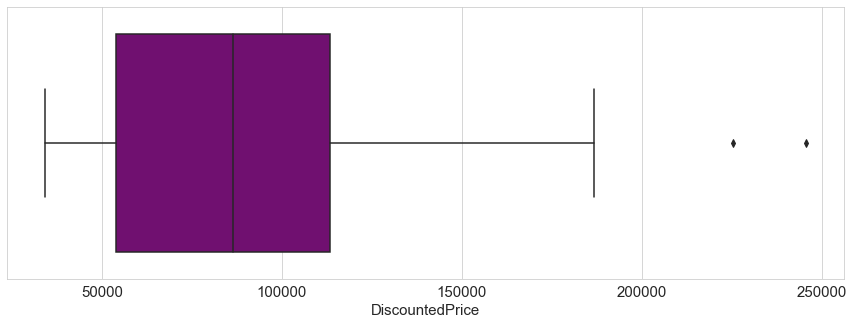

In [58]:
plt.figure(figsize=(15,5))
sbn.boxplot(data=flipkart[flipkart["Ratings"]==flipkart["Ratings"].min()],x="DiscountedPrice",color="purple")

#### We See that laptops with 0 ratings have Avergae price aroun 80 K and lies in range of 52K to 110K and also there are some outliers and this means that There may be very expensive laptops which mostly people dont buy and thats why they are rated 0, or the laptops in rnge 52 K to 110K, the laptops may be new and latest in market and no has yet purchased or the kaptops might be having bad impression and no one tends to go for those laptops. But This range Can have laptops whcih are pocket friendly

#### So We can Do Analysis depending on various facts and draw variety of conclusions. But the aboobe were all extra High Low ratings,Cost analysis, But the one whcih we did i.e Check which was the most displayed config on flipkart and from them pick top 3 Brands and from those brands,Which models are Affordable,Pocket friendly and have ratings >=4 makes sense.

In [60]:
flipkart.shape

(245, 18)